In [484]:
suppressPackageStartupMessages({
    # library(gdata)
    # library(singlecellmethods)
    library(matrixStats)
    library(data.table)
    # library(viridis)
    # library(seaborn)
    library(RColorBrewer)
    # library(pheatmap)
    library(Matrix)
    # library(harmony)
    library(uwot)
    library(irlba)
    library(Seurat)
    library(tidyverse)
    # library(presto)
    library(SeuratData)
    library(stringi)

})

In [4]:
source('../../../GSK/Github/minecraft-seq/scripts/utils.R') #extra functions 
source('../../../GSK/Github/minecraft-seq/scripts/misc_funcs.R') #extra functions #2


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [5]:
stats_all = list()

# Load alignment stats from other papers

In [178]:
dataset = 'AMP-RA'

In [179]:
data_dir = '/data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38'

In [180]:
data_dirs = list.dirs(path = data_dir, recursive = FALSE)

In [181]:
stats = do.call(rbind, lapply(data_dirs, function(x){
    name = x %>% str_replace(data_dir, '') %>% str_replace('/', '')
    dat = read_csv(paste0(x, '/outs/metrics_summary.csv')) %>% as.data.frame    
    rownames(dat) = name
    dat
})
)

Rows: 1 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): Valid Barcodes, Sequencing Saturation, Q30 Bases in Barcode, Q30 B...
dbl  (1): Antibody: Median UMIs per Cell (summed over all recognized antibod...
num  (9): Estimated Number of Cells, Mean Reads per Cell, Median Genes per C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): Valid Barcodes, Sequencing Saturation, Q30 Bases in Barcode, Q30 B...
dbl  (1): Antibody: Median UMIs per Cell (summed over all recognized antibod...
num  (9): Estimated Number of Cells, Mean Reads per Cell, Median Genes per C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` t

In [9]:
stats %>% head(2)
stats %>% colnames

,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Sequencing Saturation,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in Sample Index,Q30 Bases in UMI,⋯,Antibody: Q30 Bases in Barcode,Antibody: Q30 Bases in Antibody Read,Antibody: Q30 Bases in UMI,Antibody: Fraction Antibody Reads,Antibody: Fraction Antibody Reads Usable,Antibody: Antibody Reads Usable per Cell,Antibody: Fraction Reads in Barcodes with High UMI Counts,Antibody: Fraction Unrecognized Antibody,Antibody: Antibody Reads in Cells,Antibody: Median UMIs per Cell (summed over all recognized antibody barcodes)
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
BRI-399,11905,61288,2277,729635634,97.3%,64.2%,94.3%,92.6%,91.3%,94.0%,⋯,98.9%,48.8%,98.8%,97.0%,47.5%,2118,0.0%,3.0%,49.5%,458
BRI-401,8540,70684,1910,603641461,97.1%,72.2%,94.3%,92.4%,88.5%,94.1%,⋯,98.8%,47.7%,98.4%,97.2%,54.7%,3534,0.0%,2.8%,56.8%,806


[1] "Estimated Number of Cells"                                                    
 [2] "Mean Reads per Cell"                                                          
 [3] "Median Genes per Cell"                                                        
 [4] "Number of Reads"                                                              
 [5] "Valid Barcodes"                                                               
 [6] "Sequencing Saturation"                                                        
 [7] "Q30 Bases in Barcode"                                                         
 [8] "Q30 Bases in RNA Read"                                                        
 [9] "Q30 Bases in Sample Index"                                                    
[10] "Q30 Bases in UMI"                                                             
[11] "Reads Mapped to Genome"                                                       
[12] "Reads Mapped Confidently to Genome"                                           
[13] "Reads Mapped Confidently to Intergenic Regions"                               
[14] "Reads Mapped Confidently to Intronic Regions"                                 
[15] "Reads Mapped Confidently to Exonic Regions"                                   
[16] "Reads Mapped Confidently to Transcriptome"                                    
[17] "Reads Mapped Antisense to Gene"                                               
[18] "Fraction Reads in Cells"                                                      
[19] "Total Genes Detected"                                                         
[20] "Median UMI Counts per Cell"                                                   
[21] "Antibody: Number of Reads"                                                    
[22] "Antibody: Mean Reads per Cell"                                                
[23] "Antibody: Valid Barcodes"                                                     
[24] "Antibody: Sequencing Saturation"                                              
[25] "Antibody: Q30 Bases in Barcode"                                               
[26] "Antibody: Q30 Bases in Antibody Read"                                         
[27] "Antibody: Q30 Bases in UMI"                                                   
[28] "Antibody: Fraction Antibody Reads"                                            
[29] "Antibody: Fraction Antibody Reads Usable"                                     
[30] "Antibody: Antibody Reads Usable per Cell"                                     
[31] "Antibody: Fraction Reads in Barcodes with High UMI Counts"                    
[32] "Antibody: Fraction Unrecognized Antibody"                                     
[33] "Antibody: Antibody Reads in Cells"                                            
[34] "Antibody: Median UMIs per Cell (summed over all recognized antibody barcodes)"

In [182]:
vars = c('Reads Mapped to Genome', 'Reads Mapped Confidently to Genome',
         'Reads Mapped Confidently to Transcriptome', 
         'Antibody: Fraction Antibody Reads',
        'Antibody: Fraction Antibody Reads Usable')

stats = stats %>% mutate(across(all_of(vars), function(x) {
  str_replace_all(x, "%", "")}))

stats = stats %>% mutate(across(all_of(vars), as.numeric))

In [183]:
stats_all[[dataset]] = stats

In [12]:
stats['Reads Mapped to Genome'] %>% min

[1] 84.1

In [13]:
stats['BRI-487', 20:34]

,Median UMI Counts per Cell,Antibody: Number of Reads,Antibody: Mean Reads per Cell,Antibody: Valid Barcodes,Antibody: Sequencing Saturation,Antibody: Q30 Bases in Barcode,Antibody: Q30 Bases in Antibody Read,Antibody: Q30 Bases in UMI,Antibody: Fraction Antibody Reads,Antibody: Fraction Antibody Reads Usable,Antibody: Antibody Reads Usable per Cell,Antibody: Fraction Reads in Barcodes with High UMI Counts,Antibody: Fraction Unrecognized Antibody,Antibody: Antibody Reads in Cells,Antibody: Median UMIs per Cell (summed over all recognized antibody barcodes)
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
BRI-487,6483,59700255,4272,98.9%,16.5%,98.7%,40.2%,98.7%,96.2,51.4,2195,0.0%,3.8%,54.0%,1045


In [287]:
set.seed(123) 
sampled = rownames(stats) %>% sample(5)
sampled

[1] "BRI-487" "BRI-625" "BRI-548" "BRI-427" "BRI-601"

In [289]:
stats[sampled, vars]

,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Transcriptome,Antibody: Valid Barcodes
,<dbl>,<dbl>,<dbl>,<dbl>
BRI-487,97.2,92.5,58.4,98.9
BRI-625,96.3,91.8,54.3,99.0
BRI-548,97.6,94.1,49.9,99.0
BRI-427,96.5,91.7,56.1,98.9
BRI-601,96.4,91.9,57.0,99.0


In [184]:
dataset = 'TBRU'
data_dir = '/data/srlab1/TBRU/cellranger-3.1.0/GRCh38'
data_dirs = list.dirs(path = data_dir, recursive = FALSE)

In [185]:
stats = do.call(rbind, lapply(data_dirs, function(x){
    name = x %>% str_replace(data_dir, '') %>% str_replace('/', '')
    dat = read_csv(paste0(x, '/outs/metrics_summary.csv')) %>% as.data.frame    
    rownames(dat) = name
    dat
})
)

Rows: 1 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): Valid Barcodes, Sequencing Saturation, Q30 Bases in Barcode, Q30 B...
num (10): Estimated Number of Cells, Mean Reads per Cell, Median Genes per C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): Valid Barcodes, Sequencing Saturation, Q30 Bases in Barcode, Q30 B...
num (10): Estimated Number of Cells, Mean Reads per Cell, Median Genes per C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): Valid Barcod

In [321]:
stats %>% head(2)
stats %>% colnames

,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Sequencing Saturation,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in Sample Index,Q30 Bases in UMI,⋯,Antibody: Q30 Bases in Barcode,Antibody: Q30 Bases in Antibody Read,Antibody: Q30 Bases in UMI,Antibody: Fraction Antibody Reads,Antibody: Fraction Antibody Reads Usable,Antibody: Antibody Reads Usable per Cell,Antibody: Fraction Reads in Barcodes with High UMI Counts,Antibody: Fraction Unrecognized Antibody,Antibody: Antibody Reads in Cells,Antibody: Median UMIs per Cell (summed over all recognized antibody barcodes)
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
BRI_260R,14653,30459,1508,446320014,97.6%,59.9%,98.0%,93.8%,96.4%,97.7%,⋯,98.9%,46.3%,98.7%,97.5%,83.4%,1688,0.0%,2.5%,86.5%,1170
BRI_262,13818,30879,1375,426691892,97.8%,67.3%,97.9%,92.7%,96.5%,97.7%,⋯,98.8%,46.2%,98.7%,97.2%,82.7%,3182,0.0%,2.8%,86.0%,2036


[1] "Estimated Number of Cells"                                                    
 [2] "Mean Reads per Cell"                                                          
 [3] "Median Genes per Cell"                                                        
 [4] "Number of Reads"                                                              
 [5] "Valid Barcodes"                                                               
 [6] "Sequencing Saturation"                                                        
 [7] "Q30 Bases in Barcode"                                                         
 [8] "Q30 Bases in RNA Read"                                                        
 [9] "Q30 Bases in Sample Index"                                                    
[10] "Q30 Bases in UMI"                                                             
[11] "Reads Mapped to Genome"                                                       
[12] "Reads Mapped Confidently to Genome"                                           
[13] "Reads Mapped Confidently to Intergenic Regions"                               
[14] "Reads Mapped Confidently to Intronic Regions"                                 
[15] "Reads Mapped Confidently to Exonic Regions"                                   
[16] "Reads Mapped Confidently to Transcriptome"                                    
[17] "Reads Mapped Antisense to Gene"                                               
[18] "Fraction Reads in Cells"                                                      
[19] "Total Genes Detected"                                                         
[20] "Median UMI Counts per Cell"                                                   
[21] "Antibody: Number of Reads"                                                    
[22] "Antibody: Mean Reads per Cell"                                                
[23] "Antibody: Valid Barcodes"                                                     
[24] "Antibody: Sequencing Saturation"                                              
[25] "Antibody: Q30 Bases in Barcode"                                               
[26] "Antibody: Q30 Bases in Antibody Read"                                         
[27] "Antibody: Q30 Bases in UMI"                                                   
[28] "Antibody: Fraction Antibody Reads"                                            
[29] "Antibody: Fraction Antibody Reads Usable"                                     
[30] "Antibody: Antibody Reads Usable per Cell"                                     
[31] "Antibody: Fraction Reads in Barcodes with High UMI Counts"                    
[32] "Antibody: Fraction Unrecognized Antibody"                                     
[33] "Antibody: Antibody Reads in Cells"                                            
[34] "Antibody: Median UMIs per Cell (summed over all recognized antibody barcodes)"

In [186]:
vars = c('Reads Mapped to Genome', 'Reads Mapped Confidently to Genome',
         'Reads Mapped Confidently to Transcriptome', 
         'Antibody: Fraction Antibody Reads',
        'Antibody: Fraction Antibody Reads Usable')

stats = stats %>% mutate(across(all_of(vars), function(x) {
  str_replace_all(x, "%", "")}))

stats = stats %>% mutate(across(all_of(vars), as.numeric))

In [187]:
stats_all[[dataset]] = stats

In [323]:
stats %>% colnames

[1] "Estimated Number of Cells"                                                    
 [2] "Mean Reads per Cell"                                                          
 [3] "Median Genes per Cell"                                                        
 [4] "Number of Reads"                                                              
 [5] "Valid Barcodes"                                                               
 [6] "Sequencing Saturation"                                                        
 [7] "Q30 Bases in Barcode"                                                         
 [8] "Q30 Bases in RNA Read"                                                        
 [9] "Q30 Bases in Sample Index"                                                    
[10] "Q30 Bases in UMI"                                                             
[11] "Reads Mapped to Genome"                                                       
[12] "Reads Mapped Confidently to Genome"                                           
[13] "Reads Mapped Confidently to Intergenic Regions"                               
[14] "Reads Mapped Confidently to Intronic Regions"                                 
[15] "Reads Mapped Confidently to Exonic Regions"                                   
[16] "Reads Mapped Confidently to Transcriptome"                                    
[17] "Reads Mapped Antisense to Gene"                                               
[18] "Fraction Reads in Cells"                                                      
[19] "Total Genes Detected"                                                         
[20] "Median UMI Counts per Cell"                                                   
[21] "Antibody: Number of Reads"                                                    
[22] "Antibody: Mean Reads per Cell"                                                
[23] "Antibody: Valid Barcodes"                                                     
[24] "Antibody: Sequencing Saturation"                                              
[25] "Antibody: Q30 Bases in Barcode"                                               
[26] "Antibody: Q30 Bases in Antibody Read"                                         
[27] "Antibody: Q30 Bases in UMI"                                                   
[28] "Antibody: Fraction Antibody Reads"                                            
[29] "Antibody: Fraction Antibody Reads Usable"                                     
[30] "Antibody: Antibody Reads Usable per Cell"                                     
[31] "Antibody: Fraction Reads in Barcodes with High UMI Counts"                    
[32] "Antibody: Fraction Unrecognized Antibody"                                     
[33] "Antibody: Antibody Reads in Cells"                                            
[34] "Antibody: Median UMIs per Cell (summed over all recognized antibody barcodes)"

In [324]:
stats['Reads Mapped to Genome'] %>% min

[1] 91.3

In [188]:
stats_all  %>% names

[1] "MINECRAFT-Seq" "AMP-RA"        "TBRU"

# MINECRAFT-Seq stats

## RNA/ADT

In [925]:
dataset = 'MINECRAFT-Seq'

In [926]:
mseq_exps = c('PTPRC', 'RPL8', 'DQB1', 'PTEN', 'IL2RA', 'FBXO11', 'FBXO11Reseq', 'PTPRCReseq', 'PAX5')

In [927]:
dirs_list = list()
meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/20230525/Plate_Meta.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230525/RNAOutput/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230525/ADTOutput/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230525/DNAOutput_R2/' ### which one
condition_label = 'CD45'
dirs_list['PTPRC'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/20231020/Plate_Meta.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20231020/RNAOutput_Reseq/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20231020/ADTOutput_Reseq/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20231020/DNAOutput_R2_Trimmed_NosgRNA/' 
condition_label = 'RPL8CellLine'
dirs_list['RPL8'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/PlateMeta2Full.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/RNAOutput_Reseq/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/ADTOutput_Reseq/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/DNAOutput_R2_Reseq/' ### which one
condition_label = 'DQB1'
dirs_list['DQB1'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/PlateMeta2Full.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/RNAOutput_Reseq/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/ADTOutput_Reseq/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/DNAOutput_R2_Reseq/' ### which one
condition_label = 'PTEN'
dirs_list['PTEN'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/PlateMeta2Full.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/RNAOutput_Reseq/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/ADTOutput_Reseq/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230424/DNAOutput_R2_Reseq/' ### which one
condition_label = 'FBXO11'
dirs_list['FBXO11'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))


In [928]:
meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/20230714/Plate_Meta.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230714/RNAOutput/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230714/ADTOutput/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20230714/DNAOutput_R2_Trimmed/'  ### which one
condition_label = 'IL2Ra'
dirs_list['IL2RA'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

# meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/20240924_FBXO11/Plate_Meta.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20240924_FBXO11/RNAOutput/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20240924_FBXO11/ADTOutput/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20240924_FBXO11/DNAOutput_R2/'  ### which one
condition_label = 'FBXO11'
dirs_list['FBXO11Reseq'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

In [936]:
# meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/20240924_FBXO11/Plate_Meta.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20241014_CD45/RNAOutput/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20241014_CD45/ADTOutput/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20241014_CD45/DNAOutput_R2/' 
condition_label = 'CD45'
dirs_list['PTPRCReseq'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

In [1011]:
# meta_fn = '/data/srlab1/mcurtis/GSK/Experiments/20240924_FBXO11/Plate_Meta.csv'
rna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20250108_PAX5/RNAOutput/'
adt_dir = '/data/srlab1/mcurtis/GSK/Experiments/20250108_PAX5/ADTOutput/'
dna_dir = '/data/srlab1/mcurtis/GSK/Experiments/20250108_PAX5/DNAOutput_R1/' 
condition_label = 'PAX5'
dirs_list['PAX5'] = list(c(meta_fn, rna_dir, adt_dir, dna_dir, condition_label))

In [1012]:
meta_all = data.frame()
for (exp in mseq_exps){
    if (exp=='FBXO11Reseq'){
        break
    }
    print(exp)
    meta_fn = dirs_list[[exp]][1]
    meta = read_csv(meta_fn) %>% as.data.frame

    if (exp %in% c('DQB1', 'PTEN', 'JDHEK', 'FBXO11')){
        meta = meta %>% rename(PlateLabel = Condition, RNA_Barcode = Barcode_RNA, ADT_Barcode = Barcode_ADT,
                   DNA_Barcode = Barcode_DNA)
        meta = meta %>% mutate(Condition = str_split(PlateLabel, '_') %>% map(1) %>% unlist)
    }
    print(meta$Condition %>% table)
        
    meta['Experiment'] = exp
    meta_all = rbind(meta_all, meta[c('PlateLabel', 'Condition', 'Experiment', 'RNA_Barcode', 'ADT_Barcode', 'DNA_Barcode')])
    print(meta %>% head(2))
}

[1] "PTPRC"


Rows: 16 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): PlateLabel, Condition, RNA_Barcode, DNA_Barcode, ADT_Barcode, sgRNA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.
CD45 RPL8 TYK2 
   4    4    8 
  PlateLabel Condition RNA_Barcode DNA_Barcode ADT_Barcode       sgRNA_Sequence
1    CD45_P1      CD45  AGTCCGAGGA  TAATGGCAAG  TAATTCTACC CACATCAAGGAGTAATTACC
2    CD45_P2      CD45  ACAGTTCCAG  GTGCCGCTTC  ACGCTAATTA CACATCAAGGAGTAATTACC
                                                                                                                                                                                                            Amplicon_Sequence
1 TAACAGGTCCAGGAGAGCCTCAGATTATTTTTTGTAGAAGTGAAGCTGCACATCAAGGAGTAATTACCTGGAATCCCCCTCAAAGATCATTTCATAATTTTACCCTCTGTTATATAAAAGAGACAGGTAATTTGTGTAGAATTTAATTTCATCAGAAAAGAGAAATCAAGAATTTGAAAGTACTAGAAATTTTTATTGAGCCAGTGAGTCACAAAGCTC
2 TAACAGGTCCAGGAGAGCCTCAGATTATTTTTTGTAGAAGTGAAGCTGCACATCAAGGAGTAATTACCTGGAATCCCCCTCAAAGATCATTTCATAATTTTACCCTCTGTTATATAAAAGAGACAGGTAATTTGTGTAGAATTTAATTTCATCAGAAAAGAGAAATCAAGAATTTGAAAGTACTAGAAATTTTTATTGAGCCAGTGAGTCACAAAGCTC
  ExpectedChange Experiment
1            C_T      PTPRC
2   

Rows: 16 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): PlateLabel, Condition, RNA_Barcode, DNA_Barcode, ADT_Barcode, sgRNA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.
       IL2RA         RPL8 RPL8CellLine 
           5            5            6 
  PlateLabel Condition RNA_Barcode DNA_Barcode ADT_Barcode sgRNA_Sequence
1   RPL8A_P1      RPL8        <NA>  AGAGCACTAG        <NA>           <NA>
2   RPL8A_P2      RPL8        <NA>  TGCCTTGATC        <NA>           <NA>
                                                                                                                 Reference
1 TGACCTACCTGTTCACCAGCGCGGCNGAAAGAGGAAACACGGCGTCAGCGAGCGGCCTTATCTTCCGGGGCGGGGCCCAGGGCCGCGACACCTTCCGGGCGCGCCACGGCCAGCCTAGCG
2 TGACCTACCTGTTCACCAGCGCGGCNGAAAGAGGAAACACGGCGTCAGCGAGCGGCCTTATCTTCCGGGGCGGGGCCCAGGGCCGCGACACCTTCCGGGCGCGCCACGGCCAGCCTAGCG
  ExpectedChange Read Experiment
1            A_G   R2       RPL8
2            A_G   R2       RPL8
[1] "DQB1"


Rows: 10 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Condition, Barcode_RNA, Barcode_ADT, Barcode_DNA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.
  DQB1 FBXO11   PTEN 
     4      4      2 
  PlateLabel RNA_Barcode ADT_Barcode DNA_Barcode Condition Experiment
1    DQB1_P1  CAGTCGTGCG  ACATAACGGA  AGAGCACTAG      DQB1       DQB1
2    DQB1_P2  GTCTAACCTC  TTAATAGACC  TGCCTTGATC      DQB1       DQB1
[1] "PTEN"


Rows: 10 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Condition, Barcode_RNA, Barcode_ADT, Barcode_DNA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.
  DQB1 FBXO11   PTEN 
     4      4      2 
  PlateLabel RNA_Barcode ADT_Barcode DNA_Barcode Condition Experiment
1    DQB1_P1  CAGTCGTGCG  ACATAACGGA  AGAGCACTAG      DQB1       PTEN
2    DQB1_P2  GTCTAACCTC  TTAATAGACC  TGCCTTGATC      DQB1       PTEN
[1] "IL2RA"


Rows: 17 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): PlateLabel, Condition, RNA_Barcode, DNA_Barcode, ADT_Barcode, sgRNA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.
BACH2 CIITA FOXP3 IL2Ra  TBET  <NA> 
    5     2     2     5     2     1 
  PlateLabel Condition RNA_Barcode DNA_Barcode ADT_Barcode       sgRNA_Sequence
1   CIITA_P1     CIITA  AGTTAAGAGC  CGCTCAGTTC  CTGACCGGCA CACTCACCTTAGCCTGAGCA
2   CIITA_P2     CIITA  CAGATACCAC  TATCTGACCT  GAATTGAGTG CACTCACCTTAGCCTGAGCA
                                                                                                                                                             Reference
1 CTCAGCACCTGACCGGTATCCGGGGCCCCACTCACCTTAGCCTGAGCAGGGATGCAGCGAGCGAAGGCAGGGCCTCGGCGAGTTTGTAGGCACCCAGGTCAGTGATGTTGTTCTGGGACAGACTGCGGGGACACAGTGAGGGGGAGGGCTCAGGACCAAACTTG
2 CTCAGCACCTGACCGGTATCCGGGGCCCCACTCACCTTAGCCTGAGCAGGGATGCAGCGAGCGAAGGCAGGGCCTCGGCGAGTTTGTAGGCACCCAGGTCAGTGATGTTGTTCTGGGACAGACTGCGGGGACACAGTGAGGGGGAGGGCTCAGGACCAAACTTG
  ExpectedChange Read Experiment
1            A_G Both      IL2RA
2            A_G Both      IL2RA
[1] "FBXO11"


Rows: 10 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Condition, Barcode_RNA, Barcode_ADT, Barcode_DNA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.
  DQB1 FBXO11   PTEN 
     4      4      2 
  PlateLabel RNA_Barcode ADT_Barcode DNA_Barcode Condition Experiment
1    DQB1_P1  CAGTCGTGCG  ACATAACGGA  AGAGCACTAG      DQB1     FBXO11
2    DQB1_P2  GTCTAACCTC  TTAATAGACC  TGCCTTGATC      DQB1     FBXO11


In [1013]:
for (exp in c('FBXO11Reseq', 'PTPRCReseq', 'PAX5')){
    dna_fn = dirs_list[[exp]][4]

    plate_labels = list.dirs(dna_fn, recursive = FALSE, full.names = FALSE) 
    plate_labels = plate_labels[!str_starts(plate_labels, "\\.")]
    meta = data.frame(PlateLabel = plate_labels)

    meta$DNA_Barcode = meta$PlateLabel
    # meta$RNA_Barcode = meta$PlateLabel
    # meta$ADT_Barcode = meta$PlateLabel
    
    meta$DNA_Barcode = meta$PlateLabel
    meta = meta %>% mutate(RNA_Barcode = ifelse(DNA_Barcode %in% 
                                         c('PAX5_M1A', 'PAX5_M1B'),
                                        'PAX5_M1', ifelse(DNA_Barcode %in% c('PAX5_M2A', 'PAX5_M2B'),
                                        'PAX5_M2', DNA_Barcode)))
    meta = meta %>% mutate(ADT_Barcode = ifelse(DNA_Barcode %in% 
                                         c('PAX5_M1A', 'PAX5_M1B'),
                                        'PAX5_M1', ifelse(DNA_Barcode %in% c('PAX5_M2A', 'PAX5_M2B'),
                                        'PAX5_M2', DNA_Barcode)))
    
    meta = meta %>% mutate(Condition = str_split(PlateLabel, '_') %>% map(1) %>% unlist)
    meta['Experiment'] = exp
    
    meta_all = rbind(meta_all, meta[c('PlateLabel', 'Condition', 'Experiment', 'RNA_Barcode', 'ADT_Barcode', 'DNA_Barcode')])

}

In [1014]:
meta_filt = data.frame()
for (exp in mseq_exps){
    meta_filt = rbind(meta_filt,
                      meta_all[(meta_all['Experiment']==exp) & (meta_all['Condition']==dirs_list[[exp]][5]), ])
}

meta_filt = meta_filt %>% na.omit()

In [1015]:
rownames(meta_filt) = meta_filt$PlateLabel

In [1016]:
meta_filt = meta_filt %>% rename(Barcode_RNA = RNA_Barcode, Barcode_ADT = ADT_Barcode, 
                    Barcode_DNA = DNA_Barcode)

In [1017]:
meta_filt

,PlateLabel,Condition,Experiment,Barcode_RNA,Barcode_ADT,Barcode_DNA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD45_P1,CD45_P1,CD45,PTPRC,AGTCCGAGGA,TAATTCTACC,TAATGGCAAG
CD45_P2,CD45_P2,CD45,PTPRC,ACAGTTCCAG,ACGCTAATTA,GTGCCGCTTC
CD45_P3,CD45_P3,CD45,PTPRC,CCGCATATTC,CCTTGTTAAT,CGGCAATGGA
CD45_P4,CD45_P4,CD45,PTPRC,TTATCCGATC,GTAGCCATCA,GCCGTAACCG
RPL8_D_P1,RPL8_D_P1,RPL8CellLine,RPL8,TATCATGAGA,CTGACCGGCA,CGCTCAGTTC
RPL8_D_P2,RPL8_D_P2,RPL8CellLine,RPL8,CTTGGCCTCG,GAATTGAGTG,TATCTGACCT
RPL8_D_P3,RPL8_D_P3,RPL8CellLine,RPL8,GTCTCGTGAA,GCGTGTGAGA,ATATGAGACG
RPL8_D_P4,RPL8_D_P4,RPL8CellLine,RPL8,CCATCCACGC,TCTCCATTGA,CTTATGGAAT
RPL8_D_P5,RPL8_D_P5,RPL8CellLine,RPL8,ACAACCAGGA,ACATGCATAT,TAATCTCGTC


In [971]:
meta_filt %>% head(2)

,PlateLabel,Condition,Experiment,Barcode_RNA,Barcode_ADT,Barcode_DNA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD45_P1,CD45_P1,CD45,PTPRC,AGTCCGAGGA,TAATTCTACC,TAATGGCAAG
CD45_P2,CD45_P2,CD45,PTPRC,ACAGTTCCAG,ACGCTAATTA,GTGCCGCTTC


In [1018]:
rna_stats = data.frame()
adt_stats = data.frame()


In [953]:
meta_filt

,PlateLabel,Condition,Experiment,Barcode_RNA,Barcode_ADT,Barcode_DNA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD45_P1,CD45_P1,CD45,PTPRC,AGTCCGAGGA,TAATTCTACC,TAATGGCAAG
CD45_P2,CD45_P2,CD45,PTPRC,ACAGTTCCAG,ACGCTAATTA,GTGCCGCTTC
CD45_P3,CD45_P3,CD45,PTPRC,CCGCATATTC,CCTTGTTAAT,CGGCAATGGA
CD45_P4,CD45_P4,CD45,PTPRC,TTATCCGATC,GTAGCCATCA,GCCGTAACCG
RPL8_D_P1,RPL8_D_P1,RPL8CellLine,RPL8,TATCATGAGA,CTGACCGGCA,CGCTCAGTTC
RPL8_D_P2,RPL8_D_P2,RPL8CellLine,RPL8,CTTGGCCTCG,GAATTGAGTG,TATCTGACCT
RPL8_D_P3,RPL8_D_P3,RPL8CellLine,RPL8,GTCTCGTGAA,GCGTGTGAGA,ATATGAGACG
RPL8_D_P4,RPL8_D_P4,RPL8CellLine,RPL8,CCATCCACGC,TCTCCATTGA,CTTATGGAAT
RPL8_D_P5,RPL8_D_P5,RPL8CellLine,RPL8,ACAACCAGGA,ACATGCATAT,TAATCTCGTC


In [1019]:
for (label in rownames(meta_filt)){
    print(label)
    exp = meta_filt[label, 'Experiment']
    rna_dir = dirs_list[[exp]][2]
    rna_fn = paste0(rna_dir, meta_filt[label, 'Barcode_RNA'], '/Solo.out/GeneFull/Summary.csv')

    dat_rna = read_delim(rna_fn, col_names = FALSE)
    dat_rna = rbind(dat_rna, c('PlateLabel', label), c('Experiment', exp))

    adt_dir = dirs_list[[exp]][3]
    adt_fn = paste0(adt_dir, meta_filt[label, 'Barcode_ADT'], '/run_info.json')

    if (exp != 'PTPRCReseq'){
        dat_adt = rjson::fromJSON(file = adt_fn) %>% as.data.frame
        dat_adt = rjson::fromJSON(file = adt_fn) %>% as.data.frame %>% t %>% as.data.frame
        dat_adt = dat_adt %>% rownames_to_column('X1')
        dat_adt = rbind(dat_adt, c('PlateLabel', label), c('Experiment', exp))
    } 
    
    if ((rna_stats %>% dim)[1]==0){
        rna_stats = dat_rna
        adt_stats = dat_adt} else if (exp != 'PTPRCReseq'){
        rna_stats = merge(rna_stats, dat_rna, by = 'X1')
        adt_stats = merge(adt_stats, dat_adt, by = 'X1')} else {
        rna_stats = merge(rna_stats, dat_rna, by = 'X1')
    }
    
    
}

[1] "CD45_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "RPL8_D_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "RPL8_D_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "RPL8_D_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "RPL8_D_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "RPL8_D_P5"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "RPL8_D_P6"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "DQB1_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "DQB1_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "DQB1_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "DQB1_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "PTEN_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "PTEN_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "ILRA_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "ILRA_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "ILRA_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "ILRA_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "ILRA_P5"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_5"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_6"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_7"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "FBXO11_8"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’ are duplicated in the result”


[1] "CD45_1-1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_1-2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_2-1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_2-2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_3-1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_3-2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_4-1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_4-2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_5-1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_5-2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_6-1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_A1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

[1] "PAX5_A2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

[1] "PAX5_B1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

[1] "PAX5_B2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

[1] "PAX5_M1A"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

[1] "PAX5_M1B"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

[1] "PAX5_M2A"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

[1] "PAX5_M2B"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(rna_stats, dat_rna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”
Warning message in merge.data.frame(adt_stats, dat_adt, by = "X1"):
“column names ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, ‘V1.x’, ‘V1.y’, 

In [1020]:
rna_stats = rna_stats %>% t %>% as.data.frame
colnames(rna_stats) = rna_stats[1, ]
rna_stats = rna_stats[-1,]
rownames(rna_stats) = rna_stats$PlateLabel

In [1021]:
adt_stats = adt_stats %>% t %>% as.data.frame
colnames(adt_stats) = adt_stats[1, ]
adt_stats = adt_stats[-1,]
rownames(adt_stats) = adt_stats$PlateLabel

In [1022]:
adt_stats %>% head(2)
rna_stats %>% head(2)

,call,Experiment,index_version,kallisto_version,n_bootstraps,n_processed,n_pseudoaligned,n_targets,n_unique,p_pseudoaligned,p_unique,PlateLabel,start_time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD45_P1,"/PHShome/mc1070/anaconda3/envs/kb_env/lib/python3.7/site-packages/kb_python/bins/compiled/kallisto/kallisto bus -i /data/srlab2/yb966/GSKProject/kite/featuremap/ADTFull/FeaturesMismatch.idx -o /data/srlab1/mcurtis/GSK/Experiments/20230525/ADTOutput/TAATTCTACC -x 0,0,14:0,14,26:1,0,0 -t 4 /data/srlab2/yb966/GSKProject/Experiments/20230525/RawData/MergedLanes/TAATTCTACC.1.fastq.gz /data/srlab2/yb966/GSKProject/Experiments/20230525/RawData/MergedLanes/TAATTCTACC.2.fastq.gz",PTPRC,0,0.48.0,0,5270990,3046820,0,3046820,57.8,57.8,CD45_P1,Tue May 30 13:16:13 2023
CD45_P2,"/PHShome/mc1070/anaconda3/envs/kb_env/lib/python3.7/site-packages/kb_python/bins/compiled/kallisto/kallisto bus -i /data/srlab2/yb966/GSKProject/kite/featuremap/ADTFull/FeaturesMismatch.idx -o /data/srlab1/mcurtis/GSK/Experiments/20230525/ADTOutput/ACGCTAATTA -x 0,0,14:0,14,26:1,0,0 -t 4 /data/srlab2/yb966/GSKProject/Experiments/20230525/RawData/MergedLanes/ACGCTAATTA.1.fastq.gz /data/srlab2/yb966/GSKProject/Experiments/20230525/RawData/MergedLanes/ACGCTAATTA.2.fastq.gz",PTPRC,0,0.48.0,0,2195606,1294859,0,1294859,59,59,CD45_P2,Tue May 30 13:16:54 2023


,Estimated Number of Cells,Experiment,Fraction of Reads in Cells,Mean GeneFulls per Cell,Mean Reads per Cell,Mean UMI per Cell,Median GeneFulls per Cell,Median Reads per Cell,Median UMI per Cell,Number of Reads,⋯,Q30 Bases in RNA read,Reads in Cells Mapped to Unique GeneFulls,Reads Mapped to Genome: Unique,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Transcriptome: Unique GeneFulls,Reads Mapped to Transcriptome: Unique+Multipe GeneFulls,Reads With Valid Barcodes,Sequencing Saturation,Total GeneFulls Detected,UMIs in Cells
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD45_P1,209,PTPRC,0.976116,2385,16226,12598,2383,14937,11567,5221588,⋯,0.830001,3391382,0.620248,0.819799,0.665384,0.746192,0.93595,0.224288,17805,2632996
CD45_P2,203,PTPRC,0.977088,2753,19319,15422,2768,17910,14027,5907845,⋯,0.839352,3921782,0.640069,0.847599,0.679392,0.773167,0.947942,0.202002,18349,3130739


In [1023]:
meta_filt %>% dim
adt_stats %>% dim
rna_stats %>% dim

[1] 52  6

[1] 41 13

[1] 52 22

In [1024]:
stats = merge(rna_stats, adt_stats, by = c('PlateLabel', 'Experiment'), all = TRUE)
rownames(stats) = stats[['PlateLabel']]

In [1025]:
vars = c('Reads Mapped to Genome: Unique', 'Reads Mapped to Genome: Unique+Multiple', 
        'Reads Mapped to Transcriptome: Unique GeneFulls', 'Reads Mapped to Transcriptome: Unique+Multipe GeneFulls',
        'Reads With Valid Barcodes', 'p_pseudoaligned', 'p_unique')

In [1026]:
stats = stats %>% mutate(across(all_of(vars), as.numeric))

In [1027]:
stats_all[[dataset]] = stats

In [1028]:
rna_stats

,Estimated Number of Cells,Experiment,Fraction of Reads in Cells,Mean GeneFulls per Cell,Mean Reads per Cell,Mean UMI per Cell,Median GeneFulls per Cell,Median Reads per Cell,Median UMI per Cell,Number of Reads,⋯,Q30 Bases in RNA read,Reads in Cells Mapped to Unique GeneFulls,Reads Mapped to Genome: Unique,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Transcriptome: Unique GeneFulls,Reads Mapped to Transcriptome: Unique+Multipe GeneFulls,Reads With Valid Barcodes,Sequencing Saturation,Total GeneFulls Detected,UMIs in Cells
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD45_P1,209,PTPRC,0.976116,2385,16226,12598,2383,14937,11567,5221588,⋯,0.830001,3391382,0.620248,0.819799,0.665384,0.746192,0.93595,0.224288,17805,2632996
CD45_P2,203,PTPRC,0.977088,2753,19319,15422,2768,17910,14027,5907845,⋯,0.839352,3921782,0.640069,0.847599,0.679392,0.773167,0.947942,0.202002,18349,3130739
CD45_P3,238,PTPRC,0.97804,2655,16853,14599,2650,15000,12815,5929230,⋯,0.834954,4011027,0.655068,0.854433,0.691673,0.782502,0.955688,0.134169,18472,3474749
CD45_P4,251,PTPRC,0.978649,2620,17105,14901,2528,14573,12402,6404994,⋯,0.840895,4293494,0.647653,0.853873,0.68496,0.77784,0.95327,0.12936,18748,3740169
RPL8_D_P1,262,RPL8,0.943278,4056,101943,70513,3800,64312,44198,47940975,⋯,0.827541,26709129,0.540695,0.746969,0.590627,0.679353,0.899435,0.310153,21542,18474410
RPL8_D_P2,294,RPL8,0.982154,2873,46567,36072,2802,29664,21880,21703581,⋯,0.845111,13690980,0.589477,0.80007,0.642278,0.736085,0.943735,0.226821,20058,10605305
RPL8_D_P3,303,RPL8,0.977824,2939,56235,40306,2826,38148,26641,27748568,⋯,0.850255,17039402,0.574424,0.792306,0.62799,0.724025,0.943688,0.284451,20617,12212906
RPL8_D_P4,309,RPL8,0.986699,3176,71148,52810,3102,54066,40308,35572725,⋯,0.819108,21984746,0.572867,0.769412,0.626354,0.714543,0.939342,0.258476,21190,16318324
RPL8_D_P5,343,RPL8,0.997498,5572,141442,111973,5624,128347,101770,80391875,⋯,0.817117,48514794,0.563595,0.749155,0.604993,0.68383,0.933381,0.208476,24055,38407066


In [1029]:
stats[c(vars)]

,Reads Mapped to Genome: Unique,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Transcriptome: Unique GeneFulls,Reads Mapped to Transcriptome: Unique+Multipe GeneFulls,Reads With Valid Barcodes,p_pseudoaligned,p_unique
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD45_1-1,0.152649,0.208054,0.152336,0.171465,0.620269,NA,NA
CD45_1-2,0.529856,0.698980,0.556957,0.622976,0.884384,NA,NA
CD45_2-1,0.533915,0.696591,0.533835,0.595720,0.843555,NA,NA
CD45_2-2,0.622738,0.787333,0.650641,0.720850,0.932043,NA,NA
CD45_3-1,0.632440,0.805081,0.661274,0.741915,0.947738,NA,NA
CD45_3-2,0.588469,0.749921,0.608598,0.679923,0.937186,NA,NA
CD45_4-1,0.470953,0.623377,0.492607,0.557088,0.851686,NA,NA
CD45_4-2,0.564051,0.727151,0.591469,0.661399,0.935918,NA,NA
CD45_5-1,0.429922,0.566869,0.446121,0.500445,0.804983,NA,NA


## DNA stats

In [ ]:
# for (label in rownames(meta_filt)){
#     print(label)
#     exp = meta_filt[label, 'Experiment']
#     rna_dir = dirs_list[[exp]][2]
#     rna_fn = paste0(rna_dir, meta_filt[label, 'Barcode_RNA'], '/Solo.out/GeneFull/Summary.csv')

#     dat_rna = read_delim(rna_fn, col_names = FALSE)
#     dat_rna = rbind(dat_rna, c('PlateLabel', label), c('Experiment', exp))

#     adt_dir = dirs_list[[exp]][3]
#     adt_fn = paste0(adt_dir, meta_filt[label, 'Barcode_ADT'], '/run_info.json')

#     if (exp != 'PTPRCReseq'){
#         dat_adt = rjson::fromJSON(file = adt_fn) %>% as.data.frame
#         dat_adt = rjson::fromJSON(file = adt_fn) %>% as.data.frame %>% t %>% as.data.frame
#         dat_adt = dat_adt %>% rownames_to_column('X1')
#         dat_adt = rbind(dat_adt, c('PlateLabel', label), c('Experiment', exp))
#     } 
    
#     if ((rna_stats %>% dim)[1]==0){
#         rna_stats = dat_rna
#         adt_stats = dat_adt} else if (exp != 'PTPRCReseq'){
#         rna_stats = merge(rna_stats, dat_rna, by = 'X1')
#         adt_stats = merge(adt_stats, dat_adt, by = 'X1')} else {
#         rna_stats = merge(rna_stats, dat_rna, by = 'X1')
#     }
    
    
# }

In [1030]:
dna_stats_all = data.frame()

In [1031]:
for (label in rownames(meta_filt)){
    exp = meta_filt[label, 'Experiment']
    dna_dir = dirs_list[[exp]][4]

    dnastats_fn = paste0(dna_dir, meta_filt[label, 'Barcode_DNA'], '/CRISPRessoBatch_on_batch/CRISPRessoBatch_mapping_statistics.txt')
    stats = fread(dnastats_fn)
    stats$Experiment = exp
    stats$PlateLabel = label
    
    if ((dna_stats_all %>% dim)[1]==0){
        dna_stats_all = stats} else {
        dna_stats_all = rbind(dna_stats_all, stats)
    }

}

In [1002]:
# label = 'PAX5_M1A'


# exp = meta_filt[label, 'Experiment']
# dna_dir = dirs_list[[exp]][4]


# dnastats_fn = paste0(dna_dir, meta_filt[label, 'Barcode_DNA'], 
#                      '/crispresso2/*/CRISPRessoBatch_mapping_statistics.txt')
# dnastats_fn = Sys.glob(dnastats_fn)
# stats = fread(dnastats_fn)


In [1032]:
dna_stats_all = dna_stats_all %>% mutate(pct_aligned = `READS ALIGNED`/`READS IN INPUTS`)

In [1033]:
dna_stats_all

Batch,READS IN INPUTS,READS AFTER PREPROCESSING,READS ALIGNED,N_COMPUTED_ALN,N_CACHED_ALN,N_COMPUTED_NOTALN,N_CACHED_NOTALN,Experiment,PlateLabel,pct_aligned
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
A1,1116,1116,1110,175,935,6,0,PTPRC,CD45_P1,0.9946237
A2,561,561,555,90,465,6,0,PTPRC,CD45_P1,0.9893048
A3,68,68,64,16,48,4,0,PTPRC,CD45_P1,0.9411765
A4,477,477,475,94,381,2,0,PTPRC,CD45_P1,0.9958071
A5,20,20,14,6,8,6,0,PTPRC,CD45_P1,0.7000000
A6,44,44,40,6,34,4,0,PTPRC,CD45_P1,0.9090909
A7,262,262,257,65,192,5,0,PTPRC,CD45_P1,0.9809160
A8,74,74,67,22,45,7,0,PTPRC,CD45_P1,0.9054054
A9,1256,1256,1249,197,1052,7,0,PTPRC,CD45_P1,0.9944268


In [1034]:
dna_stats = dna_stats_all %>% group_by(PlateLabel, Experiment) %>% summarise_at(vars(`READS ALIGNED`,
                                                            `READS IN INPUTS`), funs(sum(.))) %>% as.data.frame

dna_stats = dna_stats %>% mutate(pct_aligned = `READS ALIGNED`/`READS IN INPUTS`)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [1035]:
dna_stats

PlateLabel,Experiment,READS ALIGNED,READS IN INPUTS,pct_aligned
<chr>,<chr>,<int>,<int>,<dbl>
CD45_1-1,PTPRCReseq,440721,904264,0.48738090
CD45_1-2,PTPRCReseq,921677,3340027,0.27594897
CD45_2-1,PTPRCReseq,674732,1057836,0.63784178
CD45_2-2,PTPRCReseq,432764,1414854,0.30587184
CD45_3-1,PTPRCReseq,109528,1520329,0.07204230
CD45_3-2,PTPRCReseq,732979,1662704,0.44083553
CD45_4-1,PTPRCReseq,626799,719131,0.87160615
CD45_4-2,PTPRCReseq,754103,1579507,0.47742935
CD45_5-1,PTPRCReseq,502944,610337,0.82404311


## ADT read mapping to genomic DNA

In [1040]:
adt_torna_stats = data.frame()

for (label in rownames(meta_filt)){
    print(label)
    exp = meta_filt[label, 'Experiment']
    if (exp == 'PTPRCReseq'){
        next
    }
    adt_dir = dirs_list[[exp]][3]
    
    exp = meta_filt[label, 'Experiment']
    adt_dir = dirs_list[[exp]][3]
    adt_torna_dir = adt_dir %>% stri_replace_last_fixed('/', '_AligntoTranscriptome/')

    adt_torna_fn = paste0(adt_torna_dir, meta_filt[label, 'Barcode_ADT'], '/Solo.out/GeneFull/Summary.csv')


    dat_adt_torna = read_delim(adt_torna_fn, col_names = FALSE)


    dat_adt_torna = rbind(dat_adt_torna, c('PlateLabel', label), c('Experiment', exp))


    if ((adt_torna_stats %>% dim)[1]==0){
        adt_torna_stats = dat_adt_torna
        } else if (exp != 'PTPRCReseq'){
        adt_torna_stats = merge(adt_torna_stats, dat_adt_torna, by = 'X1')}

}

[1] "CD45_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "RPL8_D_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "RPL8_D_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "RPL8_D_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "RPL8_D_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "RPL8_D_P5"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "RPL8_D_P6"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "DQB1_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "DQB1_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "DQB1_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "DQB1_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PTEN_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PTEN_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "ILRA_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "ILRA_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "ILRA_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "ILRA_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "ILRA_P5"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_P1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_P2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_P3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_P4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_3"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_4"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_5"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_6"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_7"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "FBXO11_8"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "CD45_1-1"
[1] "CD45_1-2"
[1] "CD45_2-1"
[1] "CD45_2-2"
[1] "CD45_3-1"
[1] "CD45_3-2"
[1] "CD45_4-1"
[1] "CD45_4-2"
[1] "CD45_5-1"
[1] "CD45_5-2"
[1] "CD45_6-1"
[1] "PAX5_A1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_A2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_B1"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_B2"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_M1A"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_M1B"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_M2A"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


[1] "PAX5_M2B"


Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (1): X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in merge.data.frame(adt_torna_stats, dat_adt_torna, by = "X1"):
“column names ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’, ‘X2.x’, ‘X2.y’ are duplicated in the result”


In [1041]:
adt_torna_stats = adt_torna_stats %>% t %>% as.data.frame
colnames(adt_torna_stats) = adt_torna_stats[1, ]
adt_torna_stats = adt_torna_stats[-1,]
rownames(adt_torna_stats) = adt_torna_stats$PlateLabel

In [1042]:
adt_torna_stats

,Estimated Number of Cells,Experiment,Fraction of Reads in Cells,Mean GeneFulls per Cell,Mean Reads per Cell,Mean UMI per Cell,Median GeneFulls per Cell,Median Reads per Cell,Median UMI per Cell,Number of Reads,⋯,Q30 Bases in RNA read,Reads in Cells Mapped to Unique GeneFulls,Reads Mapped to Genome: Unique,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Transcriptome: Unique GeneFulls,Reads Mapped to Transcriptome: Unique+Multipe GeneFulls,Reads With Valid Barcodes,Sequencing Saturation,Total GeneFulls Detected,UMIs in Cells
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD45_P1,353,PTPRC,0.99403,621,1567,1545,570,1252,1240,5270990,⋯,0.794012,553314,0.176061,0.380992,0.105604,0.153565,0.972803,0.0138906,9910,545663
CD45_P2,365,PTPRC,0.997866,367,711,703,336,608,601,2195606,⋯,0.791889,259515,0.19482,0.421377,0.11845,0.171251,0.977104,0.0108586,8420,256697
CD45_P3,370,PTPRC,0.994764,706,1560,1545,636,1306,1294,5060243,⋯,0.785413,577318,0.17822,0.391883,0.11469,0.164877,0.965315,0.0096992,10540,571721
CD45_P4,362,PTPRC,0.994393,689,1565,1551,630,1299,1284,4784208,⋯,0.78044,566775,0.188639,0.413529,0.119136,0.172114,0.963899,0.00933556,10451,561522
RPL8_D_P1,356,RPL8,0.992654,94,204,123,68,141,89,9214456,⋯,0.667922,72972,0.00997259,0.0203125,0.0079779,0.00999744,0.665754,0.397785,5942,43986
RPL8_D_P2,297,RPL8,0.966168,423,906,763,287,555,411,10303295,⋯,0.64439,269247,0.0358753,0.0783487,0.0270472,0.0371258,0.75745,0.170137,9660,226635
RPL8_D_P3,305,RPL8,0.95118,604,1288,1195,434,794,689,11976529,⋯,0.654368,392884,0.0466787,0.101953,0.0344882,0.0485517,0.777429,0.0959378,10677,364596
RPL8_D_P4,331,RPL8,0.99415,483,917,809,417,736,657,11396317,⋯,0.684523,303847,0.0368515,0.0793992,0.0268188,0.0373851,0.729478,0.118821,10287,267873
RPL8_D_P5,351,RPL8,0.995159,1398,4394,4369,1405,3887,3865,12161376,⋯,0.772847,1542483,0.180221,0.400724,0.127452,0.184948,0.948925,0.00574327,12408,1533687


In [1043]:
vars = c('Reads Mapped to Genome: Unique', 'Reads Mapped to Genome: Unique+Multiple', 
        'Reads Mapped to Transcriptome: Unique GeneFulls', 'Reads Mapped to Transcriptome: Unique+Multipe GeneFulls',
        'Reads With Valid Barcodes')

In [1044]:
adt_torna_stats = adt_torna_stats %>% mutate(across(all_of(vars), as.numeric))

## FASTQC results

In [ ]:
merged_PAX5_A2_RNA_R2_fastqc.html

In [1045]:
mseq_exps

[1] "PTPRC"       "RPL8"        "DQB1"        "PTEN"        "IL2RA"      
[6] "FBXO11"      "FBXO11Reseq" "PTPRCReseq"  "PAX5"

In [1046]:
qc_all = data.frame()

for (label in rownames(meta_filt)){
    print(label)
    exp = meta_filt[label, 'Experiment']
    rna_dir = dirs_list[[exp]][2]
    
    if (exp %in% c('FBXO11Reseq', 'PTPRCReseq')){
        qc_fn = paste0(rna_dir %>% stri_replace_last_fixed('/', '_fastqc/'), 'RNA/', 'merged_',
               meta_filt[label, 'Barcode_RNA'], '_RNA_R2_001_fastqc/fastqc_data.txt')
    } else if (exp %in% c('PAX5')){
        qc_fn = paste0(rna_dir %>% stri_replace_last_fixed('/', '_fastqc/'), 'RNA/', 'merged_',
               meta_filt[label, 'Barcode_RNA'], '_RNA_R2_fastqc/fastqc_data.txt')
    } else {
        qc_fn = paste0(rna_dir %>% stri_replace_last_fixed('/', '_fastqc/'), 'RNA/',
               meta_filt[label, 'Barcode_RNA'], '.2_fastqc/fastqc_data.txt')
    }
    
    qc = read_delim(qc_fn, col_names = TRUE, delim = '\t') %>% t %>% as.data.frame
    colnames(qc) = qc[1, ]
    qc = qc[-1, ]
    rownames(qc) = NULL

    end_idxes = grep(">>END_MODULE", colnames(qc))

    metric = 'Adapter Content'
    start_idx = grep(paste0(">>", metric), colnames(qc))
    end_idx = end_idxes[end_idxes > start_idx][1]
    baseqc = qc[(start_idx+2):(end_idx-1)]
    baseqc = baseqc %>% apply(FUN = function(x) {
        x %>%str_split('\t') %>% map(1) %>% unlist %>% as.numeric}, MARGIN = c(1, 2))
    sampleqc_adap = baseqc %>% max
    sampleqc_adapmean = baseqc %>% mean

    metric = 'Per base sequence quality'
    start_idx = grep(paste0(">>", metric), colnames(qc))
    end_idx = end_idxes[end_idxes > start_idx][1]
    baseqc = qc[(start_idx+2):(end_idx-1)]
    baseqc = baseqc %>% apply(FUN = function(x) {
        x %>%str_split('\t') %>% map(1) %>% unlist %>% as.numeric}, MARGIN = c(1, 2))
    sampleqc_qual = baseqc %>% mean
    
    dat = data.frame(Experiment = exp, PlateLabel = label, AdapterMax = sampleqc_adap,
                     AdapterMean = sampleqc_adapmean,
                   QualityMean = sampleqc_qual)
    
    if ((qc_all %>% dim)[1]==0){
        qc_all = dat} else {
        qc_all = rbind(dat, qc_all)}
}

[1] "CD45_P1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 22000 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21996 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P3"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21994 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_P4"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21995 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "RPL8_D_P1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21985 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "RPL8_D_P2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "RPL8_D_P3"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21983 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "RPL8_D_P4"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "RPL8_D_P5"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21981 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "RPL8_D_P6"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "DQB1_P1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21981 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "DQB1_P2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21981 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "DQB1_P3"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21981 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "DQB1_P4"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21983 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PTEN_P1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PTEN_P2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21983 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "ILRA_P1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21983 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "ILRA_P2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "ILRA_P3"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "ILRA_P4"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21986 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "ILRA_P5"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21987 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_P1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_P2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21983 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_P3"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21981 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_P4"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21981 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21982 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21997 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_3"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21983 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_4"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21980 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_5"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21985 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_6"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21989 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_7"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21982 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "FBXO11_8"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21982 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_1-1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 22008 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_1-2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21986 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_2-1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21987 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_2-2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21987 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_3-1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21985 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_3-2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21987 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_4-1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21987 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_4-2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21986 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_5-1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21990 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_5-2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21990 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "CD45_6-1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21987 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_A1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21984 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_A2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21981 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_B1"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21982 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_B2"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21982 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_M1A"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21980 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_M1B"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21980 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_M2A"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21980 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "PAX5_M2B"


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 21980 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ##FastQC, 0.11.8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [1047]:
rownames(qc_all) = qc_all$PlateLabel

In [1048]:
qc %>% dim

[1]     1 21980

In [1049]:
dat

Experiment,PlateLabel,AdapterMax,AdapterMean,QualityMean
<chr>,<chr>,<dbl>,<dbl>,<dbl>
PAX5,PAX5_M2B,16.46142,8.292523,32.67736


In [1050]:
qc_all

,Experiment,PlateLabel,AdapterMax,AdapterMean,QualityMean
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
PAX5_M2B,PAX5,PAX5_M2B,16.461420,8.292523,32.67736
PAX5_M2A,PAX5,PAX5_M2A,16.461420,8.292523,32.67736
PAX5_M1B,PAX5,PAX5_M1B,16.882893,8.623418,32.40017
PAX5_M1A,PAX5,PAX5_M1A,16.882893,8.623418,32.40017
PAX5_B2,PAX5,PAX5_B2,12.891971,6.795019,32.52440
PAX5_B1,PAX5,PAX5_B1,10.442638,5.430939,33.00218
PAX5_A2,PAX5,PAX5_A2,11.945470,6.358479,32.80856
PAX5_A1,PAX5,PAX5_A1,17.418116,8.933801,32.64519
CD45_6-1,PTPRCReseq,CD45_6-1,13.477461,8.227752,32.04328


# All plots

## Alignment

In [1051]:
var_map = c('Reads Mapped to Genome: Unique+Multiple', 'Reads Mapped to Genome: Unique', 
        'Reads Mapped to Transcriptome: Unique GeneFulls',
        'p_pseudoaligned')

In [1052]:
names(var_map) = c('Reads Mapped to Genome', 'Reads Mapped Confidently to Genome',
         'Reads Mapped Confidently to Transcriptome', 
         'Antibody: Fraction Antibody Reads')

In [192]:
var_map

Reads Mapped to Genome 
        "Reads Mapped to Genome: Unique+Multiple" 
               Reads Mapped Confidently to Genome 
                 "Reads Mapped to Genome: Unique" 
        Reads Mapped Confidently to Transcriptome 
"Reads Mapped to Transcriptome: Unique GeneFulls" 
                Antibody: Fraction Antibody Reads 
                                "p_pseudoaligned"

In [76]:
# colnames(stats_all[[4]][var_map]) = names(var_map)

In [1053]:
adt_torna_stats = adt_torna_stats %>% rename(var_map[1:length(var_map)-1])

In [1054]:
stats_all[['MINECRAFT-Seq']][var_map[1:3]] = stats_all[['MINECRAFT-Seq']][var_map[1:3]] * 100 # Decimal to percent
stats_all[['MINECRAFT-Seq']] = stats_all[['MINECRAFT-Seq']] %>% rename(var_map)

In [1055]:
stats_all_df = bind_rows(lapply(stats_all, function(x){x[names(var_map)]}), .id = 'dataset')
stats_all_df[['dataset']] = factor(stats_all_df[['dataset']], c('AMP-RA', 'TBRU', 'MINECRAFT-Seq'))

stats_all_df['PlateLabel'] = stats_all_df$dataset  %>% as.character
stats_all_df[intersect(rownames(stats_all_df), rownames(meta_filt)), 
             'PlateLabel'] = meta_filt[intersect(rownames(stats_all_df), rownames(meta_filt)), c('Experiment')]

In [1056]:
stats_all_df %>% head(2)

,dataset,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Transcriptome,Antibody: Fraction Antibody Reads,PlateLabel
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CD45_1-1,MINECRAFT-Seq,20.8054,15.2649,15.2336,NA,PTPRCReseq
CD45_1-2,MINECRAFT-Seq,69.8980,52.9856,55.6957,NA,PTPRCReseq


In [387]:
stats_all_df %>% tail(2)

,dataset,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Transcriptome,Antibody: Fraction Antibody Reads,PlateLabel
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BRI_391,TBRU,96.3,92.8,53.2,97.3,TBRU
BRI_393,TBRU,96.7,93.0,51.4,97.2,TBRU


In [1057]:
label_order = stats_all_df %>%
  group_by(PlateLabel) %>%
  summarise_at(vars(`Reads Mapped to Genome`), funs(mean(., na.rm=TRUE))) %>% arrange(`Reads Mapped to Genome`)
label_order = label_order$PlateLabel %>% rev

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [1058]:
stats_all_df$PlateLabel  = factor(stats_all_df$PlateLabel, label_order)

In [1059]:
stats_all_df = stats_all_df %>% mutate(DatasetType = ifelse(dataset == 'MINECRAFT-Seq', 'MINECRAFT-Seq', 
                                             'Other'))

In [1060]:
stats_all_df = stats_all_df %>% mutate(PlateLabel_Rename = ifelse(PlateLabel =='FBXO11Reseq', 'FBXO11', as.character(PlateLabel)))

stats_all_df = stats_all_df %>% mutate(PlateLabel_Rename = ifelse(PlateLabel_Rename =='PTPRCReseq', NA, PlateLabel_Rename))

In [737]:
stats_all_df$PlateLabel%>% table

.
       TBRU      AMP-RA       PTPRC       IL2RA        RPL8      FBXO11 
         45          85           4           5           6           4 
       DQB1  PTPRCReseq        PTEN FBXO11Reseq 
          4          11           2           8 

In [738]:
stats_all_df$PlateLabel_Rename %>% table

.
AMP-RA   DQB1 FBXO11  IL2RA   PTEN  PTPRC   RPL8   TBRU   <NA> 
    85      4     12      5      2      4      6     45     11 

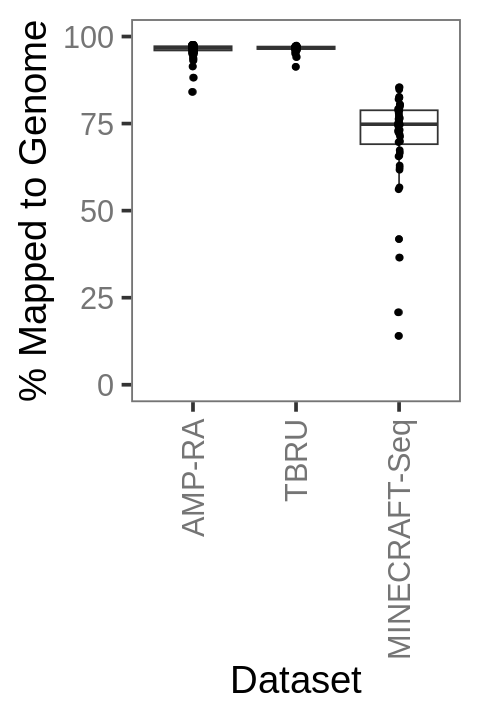

In [1061]:
fig.size(6, 4)
ggplot(stats_all_df)+
    geom_boxplot(aes(x = `dataset`, y = `Reads Mapped to Genome`))+
    geom_jitter(aes(x = `dataset`, y = `Reads Mapped to Genome`), width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Dataset')+
    ylab('% Mapped to Genome')

In [1062]:
cmap = c("darkblue","hotpink2")

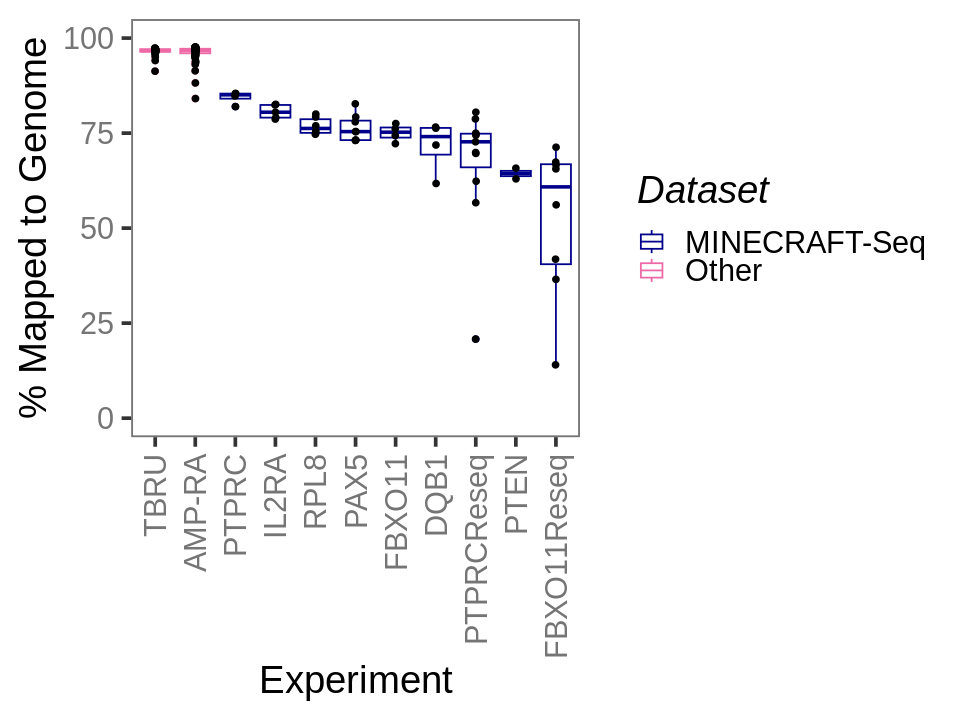

In [1063]:
fig.size(6, 8)
ggplot(stats_all_df)+
    geom_boxplot(aes(x = `PlateLabel`, y = `Reads Mapped to Genome`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel`, y = `Reads Mapped to Genome`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% Mapped to Genome')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

In [744]:
label_order

[1] "TBRU"        "AMP-RA"      "PTPRC"       "IL2RA"       "RPL8"       
 [6] "FBXO11"      "DQB1"        "PTPRCReseq"  "PTEN"        "FBXO11Reseq"

In [749]:
label_order_rename

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


ERROR: Error in label_order$PlateLabel: $ operator is invalid for atomic vectors


In [1064]:
# label_order_rename = setdiff(label_order, c('FBXO11Reseq', 'PTPRCReseq'))

# label_order_rename[c(6,7)] = label_order_rename[c(7,6)]

In [1079]:
label_order_rename = stats_all_df %>%
  group_by(PlateLabel_Rename) %>%
  summarise_at(vars(`Reads Mapped to Genome`), funs(median(., na.rm=TRUE))) %>% arrange(`Reads Mapped to Genome`)
label_order_rename = label_order_rename$PlateLabel_Rename %>% rev
label_order_rename = label_order_rename[!is.na(label_order_rename)] %>% as.vector

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [1080]:
stats_all_df$PlateLabel_Rename  = factor(stats_all_df$PlateLabel_Rename, label_order_rename)

In [1118]:
stats_all_df[setdiff(rownames(stats_all_df), c('PAX5_M1B', 'PAX5_M2B')), ]

,dataset,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Transcriptome,Antibody: Fraction Antibody Reads,PlateLabel,DatasetType,PlateLabel_Rename,ADT Reads Mapped to RNA Genome,ADT Reads Mapped to RNA Transcriptome
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<dbl>
CD45_1-1,MINECRAFT-Seq,20.8054,15.2649,15.2336,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_1-2,MINECRAFT-Seq,69.8980,52.9856,55.6957,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_2-1,MINECRAFT-Seq,69.6591,53.3915,53.3835,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_2-2,MINECRAFT-Seq,78.7333,62.2738,65.0641,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_3-1,MINECRAFT-Seq,80.5081,63.2440,66.1274,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_3-2,MINECRAFT-Seq,74.9921,58.8469,60.8598,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_4-1,MINECRAFT-Seq,62.3377,47.0953,49.2607,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_4-2,MINECRAFT-Seq,72.7151,56.4051,59.1469,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA
CD45_5-1,MINECRAFT-Seq,56.6869,42.9922,44.6121,NA,PTPRCReseq,MINECRAFT-Seq,NA,NA,NA


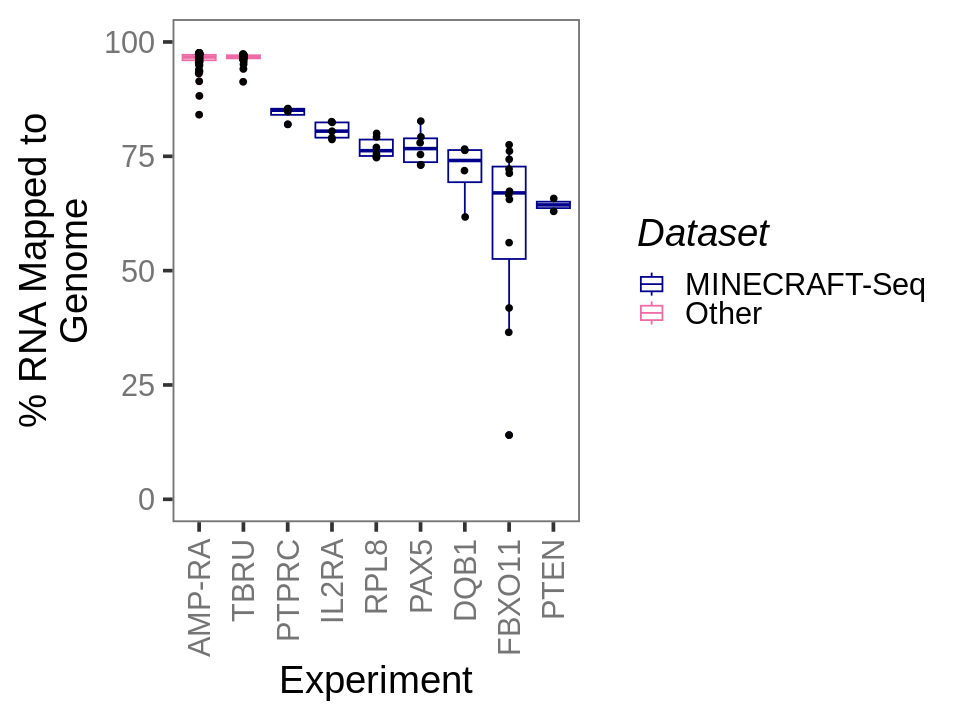

In [1121]:
# pdf(file = '../Figures/Mapping_RNAGenome.pdf', width = 8, height = 6)
fig.size(6, 8)
ggplot(stats_all_df[setdiff(rownames(stats_all_df), c('PAX5_M1B', 'PAX5_M2B')), ] %>% drop_na(PlateLabel_Rename))+
    geom_boxplot(aes(x = `PlateLabel_Rename`, y = `Reads Mapped to Genome`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel_Rename`, y = `Reads Mapped to Genome`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% RNA Mapped to\nGenome')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)
# dev.off()

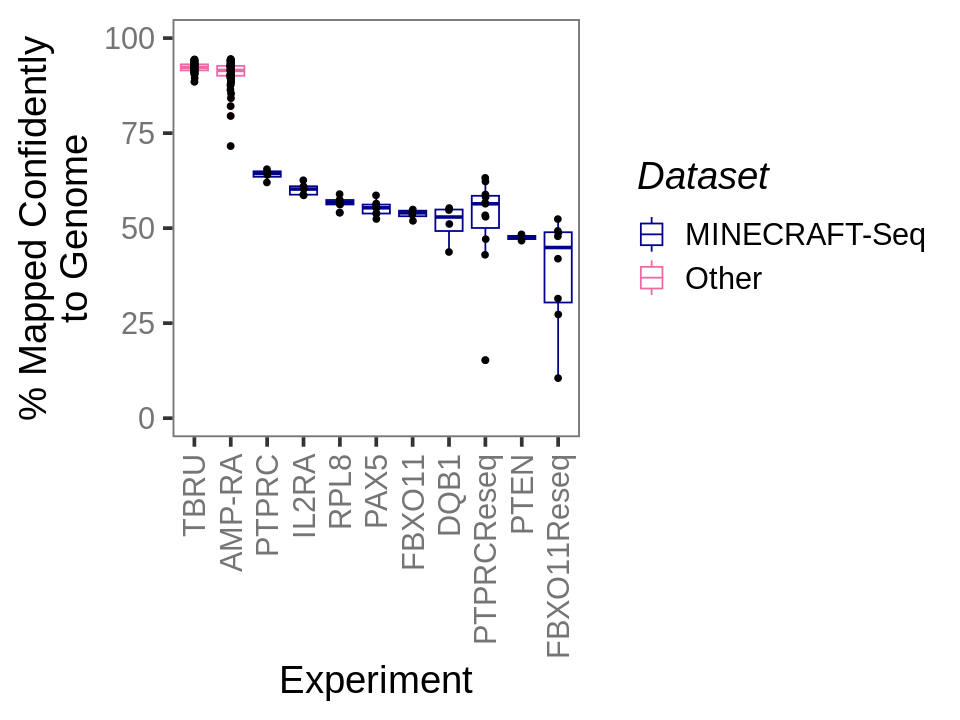

In [1084]:
fig.size(6, 8)
ggplot(stats_all_df)+
    geom_boxplot(aes(x = `PlateLabel`, y = `Reads Mapped Confidently to Genome`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel`, y = `Reads Mapped Confidently to Genome`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% Mapped Confidently\nto Genome')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

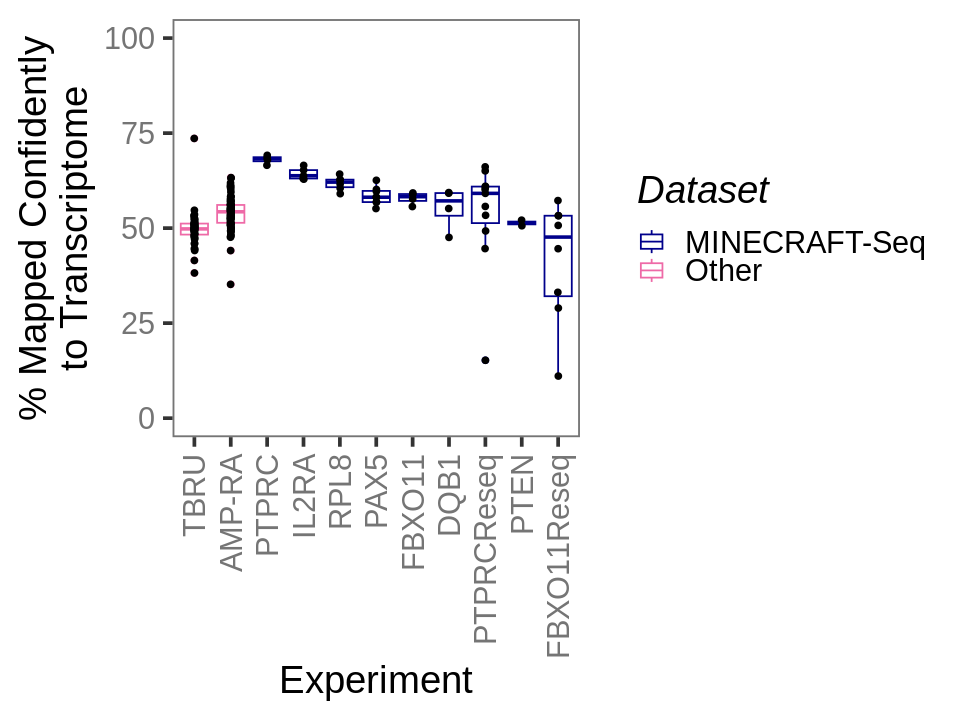

In [1085]:
fig.size(6, 8)
ggplot(stats_all_df)+
    geom_boxplot(aes(x = `PlateLabel`, y = `Reads Mapped Confidently to Transcriptome`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel`, y = `Reads Mapped Confidently to Transcriptome`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% Mapped Confidently\nto Transcriptome')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

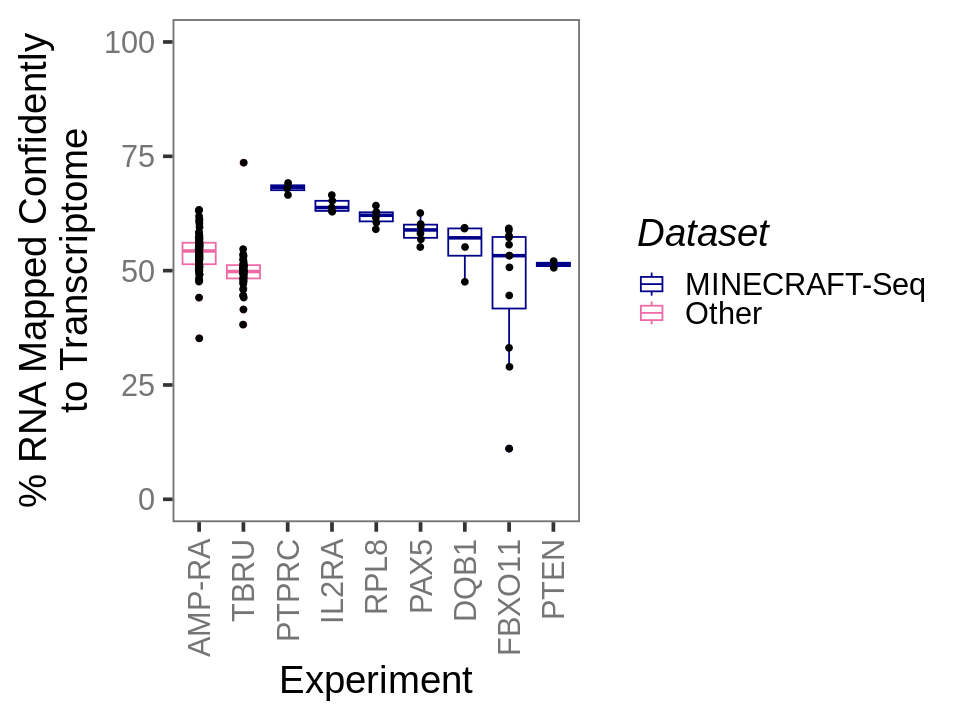

In [1124]:
# pdf(file = '../Figures/Mapping_RNATranscriptome.pdf', width = 8, height = 6)
fig.size(6, 8)
ggplot(stats_all_df[setdiff(rownames(stats_all_df), c('PAX5_M1B', 'PAX5_M2B')), ] %>% drop_na(PlateLabel_Rename))+
    geom_boxplot(aes(x = `PlateLabel_Rename`, y = `Reads Mapped Confidently to Transcriptome`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel_Rename`, y = `Reads Mapped Confidently to Transcriptome`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% RNA Mapped Confidently\nto Transcriptome')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)
# dev.off()

Warning message:
“Removed 11 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_point()`).”


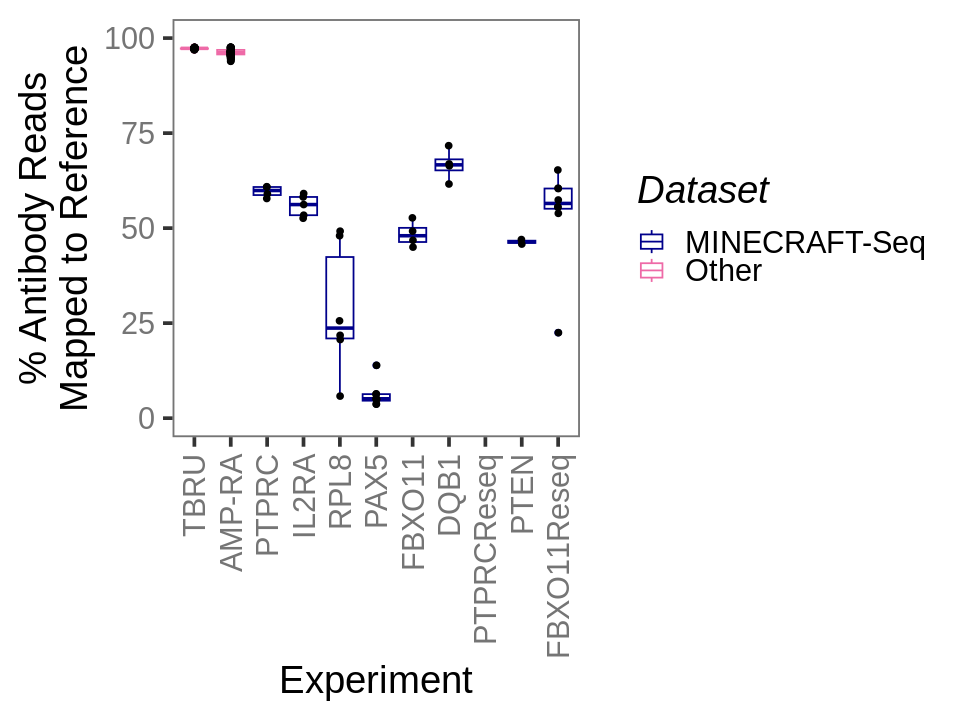

In [1089]:
fig.size(6, 8)
ggplot(stats_all_df)+
    geom_boxplot(aes(x = `PlateLabel`, y = `Antibody: Fraction Antibody Reads`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel`, y = `Antibody: Fraction Antibody Reads`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% Antibody Reads\nMapped to Reference')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

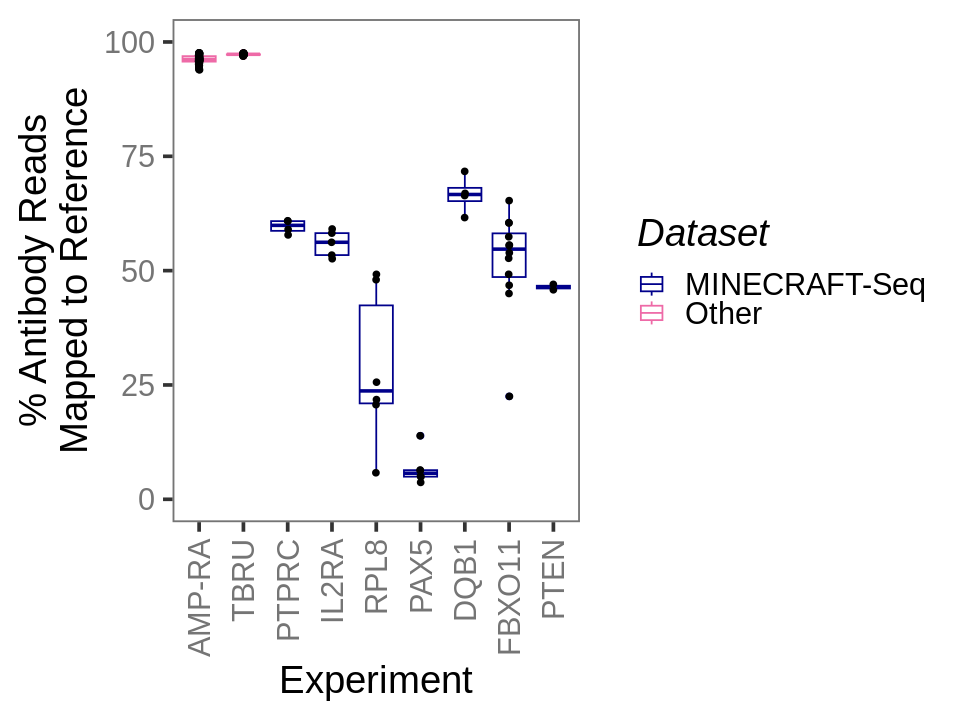

In [1128]:
# pdf(file = '../Figures/Mapping_ADTRef.pdf', width = 8, height = 6)
fig.size(6, 8)
ggplot(stats_all_df[setdiff(rownames(stats_all_df), c('PAX5_M1B', 'PAX5_M2B')), ] %>% drop_na(PlateLabel_Rename))+
    geom_boxplot(aes(x = `PlateLabel_Rename`, y = `Antibody: Fraction Antibody Reads`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel_Rename`, y = `Antibody: Fraction Antibody Reads`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% Antibody Reads\nMapped to Reference')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)
# dev.off()

In [1096]:
stats_all_df['ADT Reads Mapped to RNA Genome'] = NA

stats_all_df[rownames(adt_torna_stats), 'ADT Reads Mapped to RNA Genome'] = adt_torna_stats[[
    'Reads Mapped to Genome']]*100

stats_all_df['ADT Reads Mapped to RNA Transcriptome'] = NA

stats_all_df[rownames(adt_torna_stats), 'ADT Reads Mapped to RNA Transcriptome'] = adt_torna_stats[[
    'Reads Mapped Confidently to Transcriptome']]*100


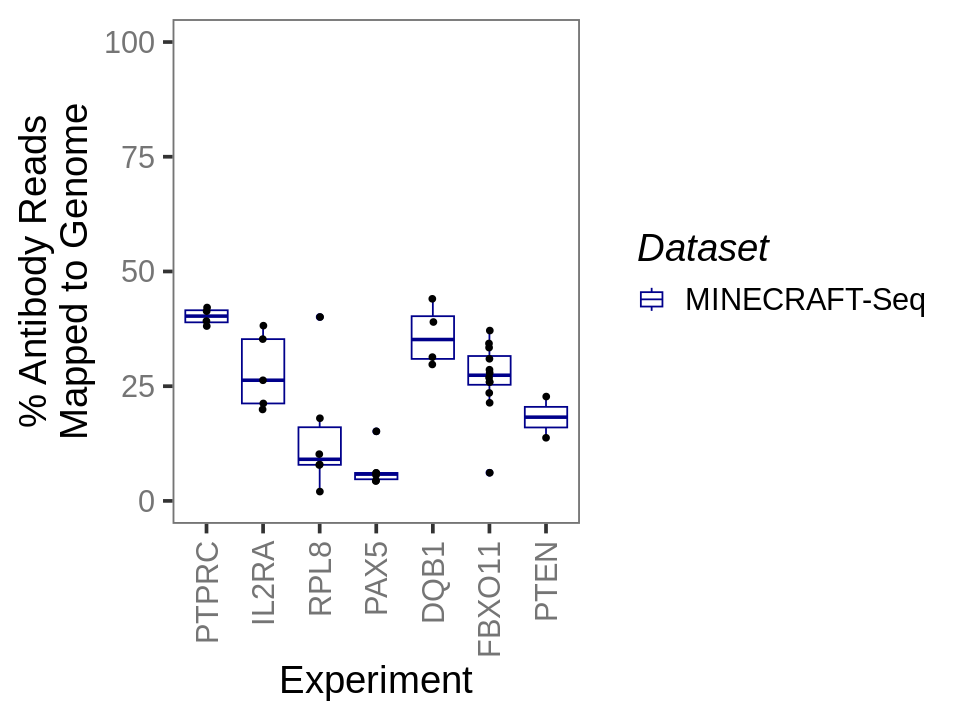

In [1131]:
# pdf(file = '../Figures/Mapping_ADTGenome.pdf', width = 8, height = 6)
fig.size(6, 8)
ggplot(stats_all_df[setdiff(rownames(stats_all_df), c('PAX5_M1B', 'PAX5_M2B')), ] %>% filter(dataset == 'MINECRAFT-Seq') %>% drop_na(PlateLabel_Rename))+
    geom_boxplot(aes(x = `PlateLabel_Rename`, y = `ADT Reads Mapped to RNA Genome`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel_Rename`, y = `ADT Reads Mapped to RNA Genome`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% Antibody Reads\nMapped to Genome')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)
# dev.off()

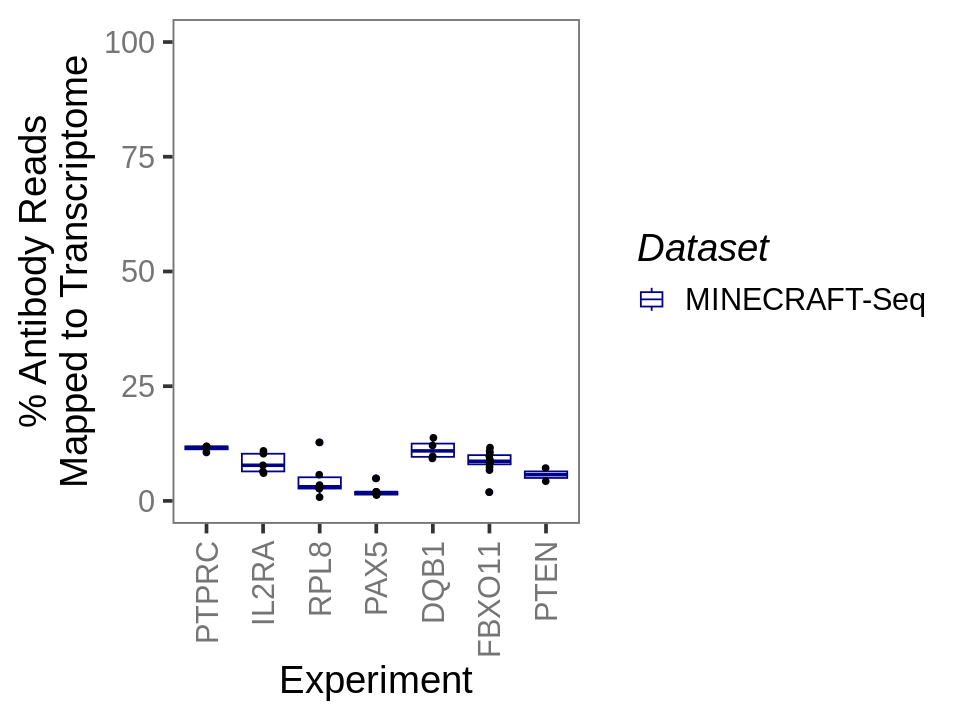

In [1104]:
fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq') %>% drop_na(PlateLabel_Rename))+
    geom_boxplot(aes(x = `PlateLabel_Rename`, y = `ADT Reads Mapped to RNA Transcriptome`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel_Rename`, y = `ADT Reads Mapped to RNA Transcriptome`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% Antibody Reads\nMapped to Transcriptome')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

In [1132]:
dna_stats$dataset = 'MINECRAFT-Seq'
dna_stats$DatasetType = 'MINECRAFT-Seq'

In [348]:
dna_stats%>% head(2)

,PlateLabel,Experiment,READS ALIGNED,READS IN INPUTS,pct_aligned,dataset,DatasetType
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
1,CD45_1-1,PTPRCReseq,440721,904264,0.4873809,MINECRAFT-Seq,MINECRAFT-Seq
2,CD45_1-2,PTPRCReseq,921677,3340027,0.2759490,MINECRAFT-Seq,MINECRAFT-Seq


In [1134]:
c(label_order[3:length(label_order)], 'PTPRCReseq')

[1] "PTPRC"       "IL2RA"       "RPL8"        "PAX5"        "FBXO11"     
 [6] "DQB1"        "PTPRCReseq"  "PTEN"        "FBXO11Reseq" "PTPRCReseq"

In [1135]:
label_order

[1] "TBRU"        "AMP-RA"      "PTPRC"       "IL2RA"       "RPL8"       
 [6] "PAX5"        "FBXO11"      "DQB1"        "PTPRCReseq"  "PTEN"       
[11] "FBXO11Reseq"

In [1136]:
dna_stats$Experiment  = factor(dna_stats$Experiment, label_order)

In [1137]:
dna_stats = dna_stats %>% mutate(Experiment_Rename = ifelse(Experiment =='FBXO11Reseq', 'FBXO11', as.character(Experiment)))

dna_stats = dna_stats %>% mutate(Experiment_Rename = ifelse(Experiment_Rename =='PTPRCReseq', NA, Experiment_Rename))


In [1138]:
dna_stats$Experiment_Rename  = factor(dna_stats$Experiment_Rename, label_order_rename)


In [1139]:
dna_stats['pct_aligned']= dna_stats['pct_aligned']*100

In [784]:
dna_stats 

PlateLabel,Experiment,READS ALIGNED,READS IN INPUTS,pct_aligned,dataset,DatasetType,Experiment_Rename
<chr>,<fct>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
CD45_1-1,PTPRCReseq,440721,904264,0.4873809,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_1-2,PTPRCReseq,921677,3340027,0.2759490,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_2-1,PTPRCReseq,674732,1057836,0.6378418,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_2-2,PTPRCReseq,432764,1414854,0.3058718,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_3-1,PTPRCReseq,109528,1520329,0.0720423,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_3-2,PTPRCReseq,732979,1662704,0.4408355,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_4-1,PTPRCReseq,626799,719131,0.8716061,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_4-2,PTPRCReseq,754103,1579507,0.4774293,MINECRAFT-Seq,MINECRAFT-Seq,NA
CD45_5-1,PTPRCReseq,502944,610337,0.8240431,MINECRAFT-Seq,MINECRAFT-Seq,NA


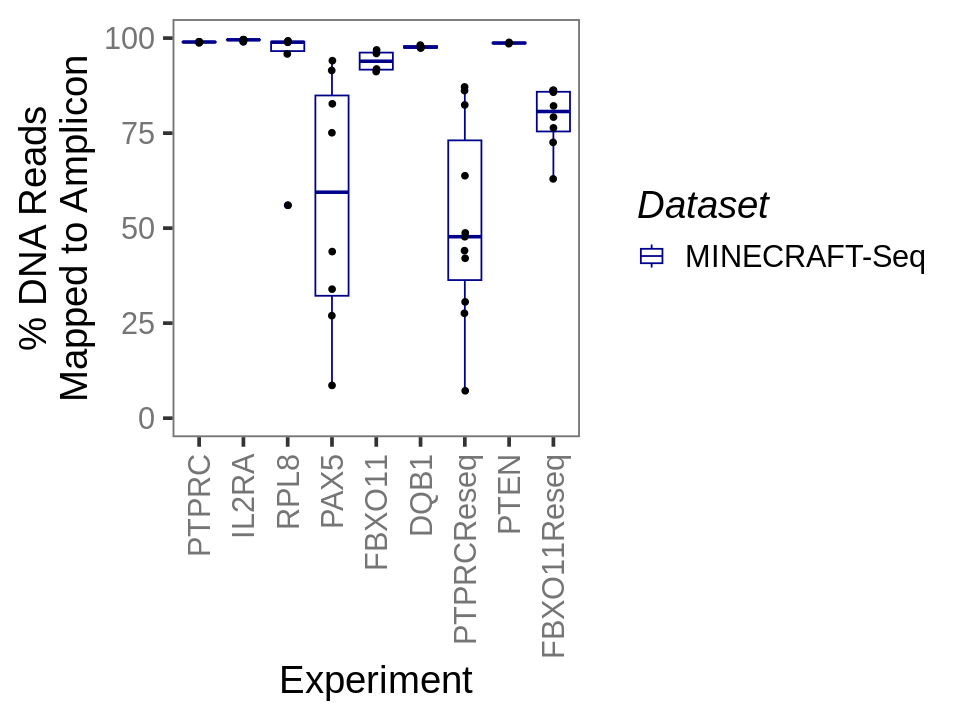

In [1140]:
fig.size(6, 8)
ggplot(dna_stats)+
    geom_boxplot(aes(x = `Experiment`, y = `pct_aligned`, col = DatasetType))+
    geom_jitter(aes(x = `Experiment`, y = `pct_aligned`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% DNA Reads\nMapped to Amplicon')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

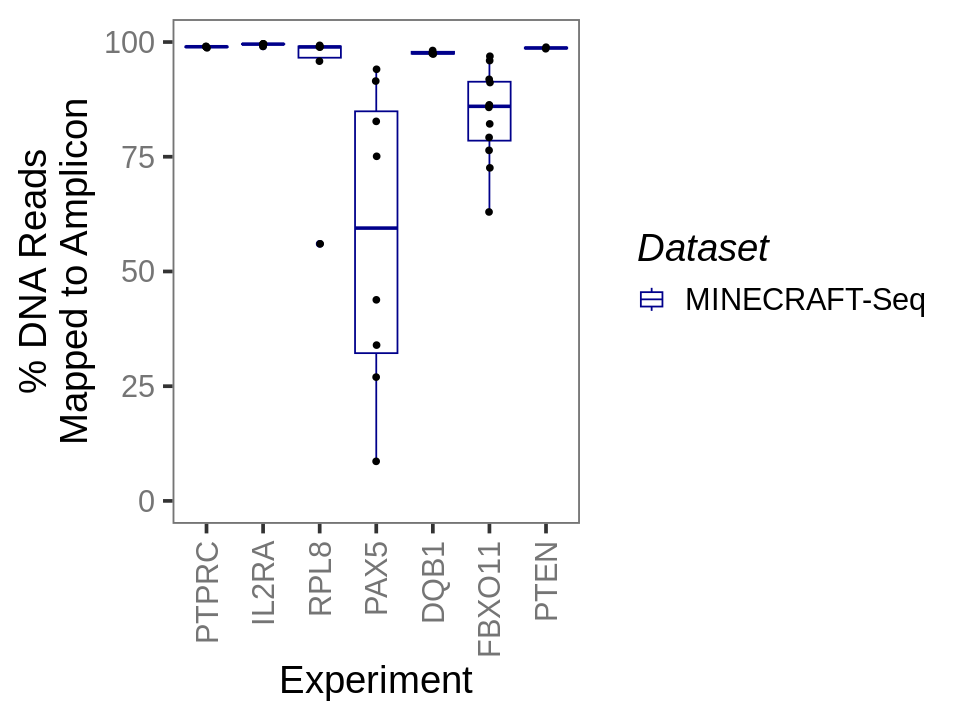

In [1146]:
# pdf(file = '../Figures/Mapping_DNAAmplicon.pdf', width = 8, height = 6)
fig.size(6, 8)
ggplot(dna_stats %>% drop_na(Experiment_Rename))+
    geom_boxplot(aes(x = `Experiment_Rename`, y = `pct_aligned`, col = DatasetType))+
    geom_jitter(aes(x = `Experiment_Rename`, y = `pct_aligned`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('% DNA Reads\nMapped to Amplicon')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)
# dev.off()

In [1144]:
dna_stats %>% filter(Experiment == 'PAX5') %>% select(PlateLabel, pct_aligned)

PlateLabel,pct_aligned
<chr>,<dbl>
PAX5_A1,94.068279
PAX5_A2,8.613553
PAX5_B1,91.488671
PAX5_B2,82.708852
PAX5_M1A,33.943362
PAX5_M1B,26.977321
PAX5_M2A,43.819144
PAX5_M2B,75.087253


In [1156]:
(dna_stats %>% drop_na(Experiment_Rename))[['pct_aligned']] %>% mean

(dna_stats %>% drop_na(Experiment_Rename))[['pct_aligned']] %>% median

[1] 85.20709

[1] 95.95028

In [1153]:
(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))[['Reads Mapped Confidently to Transcriptome']] %>% mean

(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))[['Reads Mapped Confidently to Transcriptome']] %>% median

[1] 55.96865

[1] 59.1048

In [1155]:
(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))[['Antibody: Fraction Antibody Reads']]  %>% na.omit() %>% mean

(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))[['Antibody: Fraction Antibody Reads']]  %>% na.omit() %>% median

[1] 42.00976

[1] 52.6

In [863]:
stats_all_df %>% colnames

[1] "dataset"                                  
 [2] "Reads Mapped to Genome"                   
 [3] "Reads Mapped Confidently to Genome"       
 [4] "Reads Mapped Confidently to Transcriptome"
 [5] "Antibody: Fraction Antibody Reads"        
 [6] "PlateLabel"                               
 [7] "DatasetType"                              
 [8] "Experiment"                               
 [9] "AdapterMax"                               
[10] "AdapterMean"                              
[11] "QualityMean"                              
[12] "Experiment_Rename"                        
[13] "PlateLabel_Rename"                        
[14] "ADT Reads Mapped to RNA Genome"           
[15] "ADT Reads Mapped to RNA Transcriptome"

In [1157]:
(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq') %>% filter(PlateLabel =='PTPRC'))[['Reads Mapped to Genome']] %>% mean

[1] 84.3926

In [1158]:
100-84.3926

[1] 15.6074

In [1159]:
(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq') %>% filter(PlateLabel =='IL2RA'))[['Reads Mapped to Genome']] %>% mean

[1] 80.64702

In [1160]:
100-80.64702


[1] 19.35298

In [1162]:
(stats_all_df %>% filter(dataset == 'AMP-RA'))[['Reads Mapped Confidently to Transcriptome']] %>% mean

(stats_all_df %>% filter(dataset == 'AMP-RA'))[['Reads Mapped Confidently to Transcriptome']] %>% median

[1] 53.89882

[1] 54.3

In [1164]:
(stats_all_df %>% filter(dataset == 'TBRU'))[['Reads Mapped Confidently to Transcriptome']] %>% mean

(stats_all_df %>% filter(dataset == 'TBRU'))[['Reads Mapped Confidently to Transcriptome']] %>% median

[1] 49.81556

[1] 49.8

In [876]:
stats_all_df

,dataset,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Transcriptome,Antibody: Fraction Antibody Reads,PlateLabel,DatasetType,Experiment,AdapterMax,AdapterMean,QualityMean,Experiment_Rename,PlateLabel_Rename,ADT Reads Mapped to RNA Genome,ADT Reads Mapped to RNA Transcriptome
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
BRI_260R,TBRU,96.7,92.7,38.2,97.5,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_262,TBRU,97.0,94.4,45.9,97.2,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_264,TBRU,96.7,93.9,46.0,97.2,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_272,TBRU,96.6,94.0,47.4,97.1,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_274,TBRU,96.9,94.3,49.1,97.3,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_276,TBRU,97.1,94.2,44.6,97.2,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_278,TBRU,97.1,94.1,44.1,97.3,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_282,TBRU,97.4,93.1,49.5,97.2,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA
BRI_284,TBRU,97.1,92.2,47.7,97.2,TBRU,Other,NA,NA,NA,NA,NA,TBRU,NA,NA


In [1165]:
stats_all_df = merge(stats_all_df, dna_stats %>% select(pct_aligned, PlateLabel), 
      by.x = 0, by.y = 'PlateLabel', all = TRUE)
rownames(stats_all_df) = stats_all_df[['Row.names']]
stats_all_df = stats_all_df %>% select(-`Row.names`)

## FASTQC

In [1167]:
stats_all_df = merge(stats_all_df, qc_all %>% select(-PlateLabel), by=0, all=TRUE)
rownames(stats_all_df) = stats_all_df[['Row.names']]
stats_all_df = stats_all_df %>% select(-`Row.names`)

In [617]:
stats_all_df['Reads Mapped to Genome']

,Reads Mapped to Genome
,<dbl>
BRI_260R,96.7
BRI_262,97.0
BRI_264,96.7
BRI_272,96.6
BRI_274,96.9
BRI_276,97.1
BRI_278,97.1
BRI_282,97.4
BRI_284,97.1


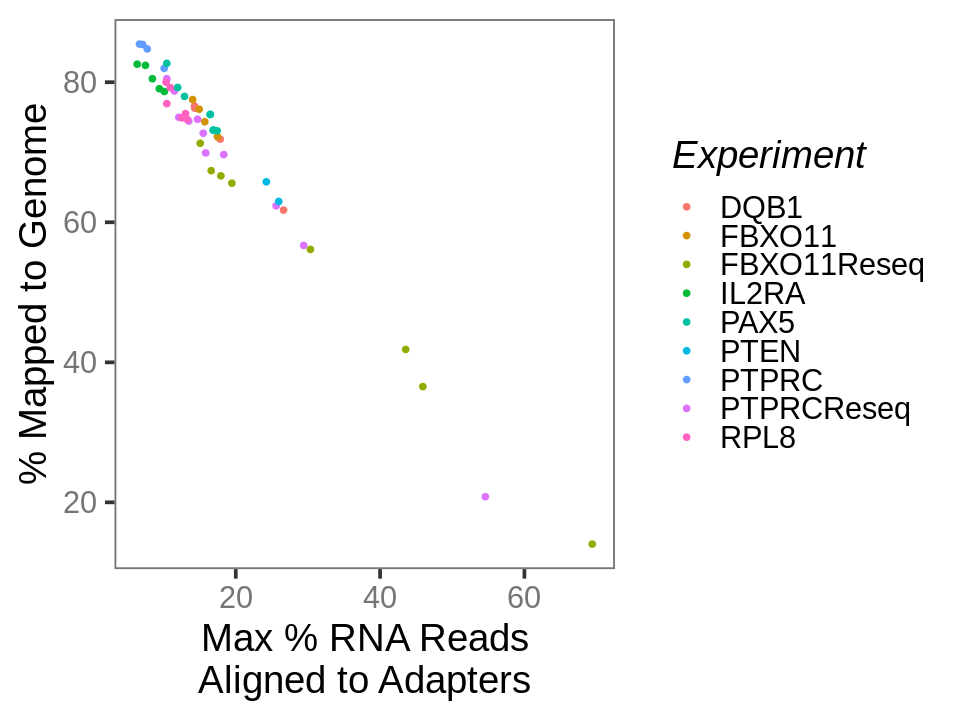

In [1168]:
fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))+
    geom_point(aes(y = `Reads Mapped to Genome`, x = `AdapterMax`, col = Experiment))+
    xlab('Max % RNA Reads\nAligned to Adapters')+
    ylab('% Mapped to Genome')+
    theme_clean()

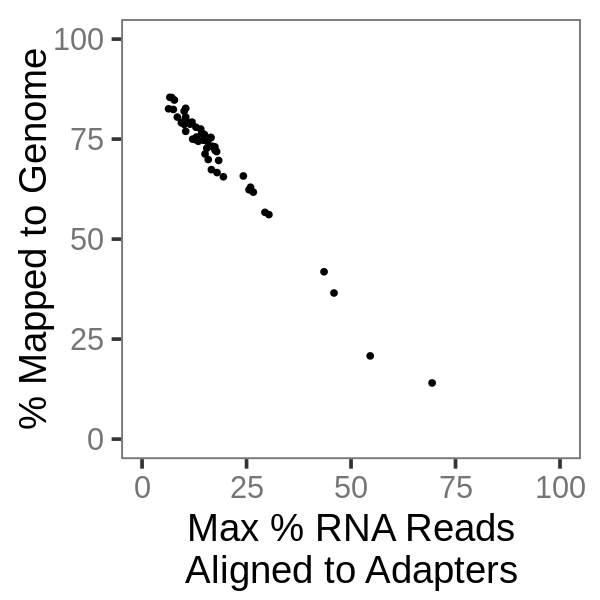

In [1169]:
fig.size(5, 5)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))+
    geom_point(aes(y = `Reads Mapped to Genome`, x = `AdapterMax`))+
    xlab('Max % RNA Reads\nAligned to Adapters')+
    ylab('% Mapped to Genome')+
    xlim(0, 100)+
    ylim(0, 100)+
    theme_clean()

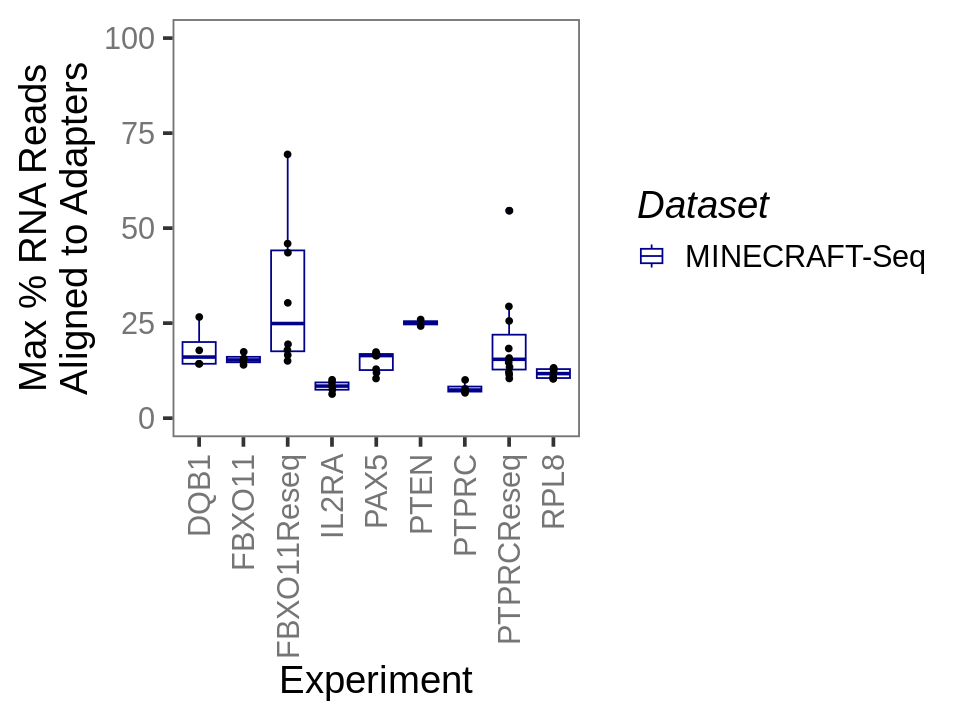

In [1170]:
fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))+
    geom_boxplot(aes(x = `Experiment`, y = `AdapterMax`, col = DatasetType))+
    geom_jitter(aes(x = `Experiment`, y = `AdapterMax`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('Max % RNA Reads\nAligned to Adapters')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

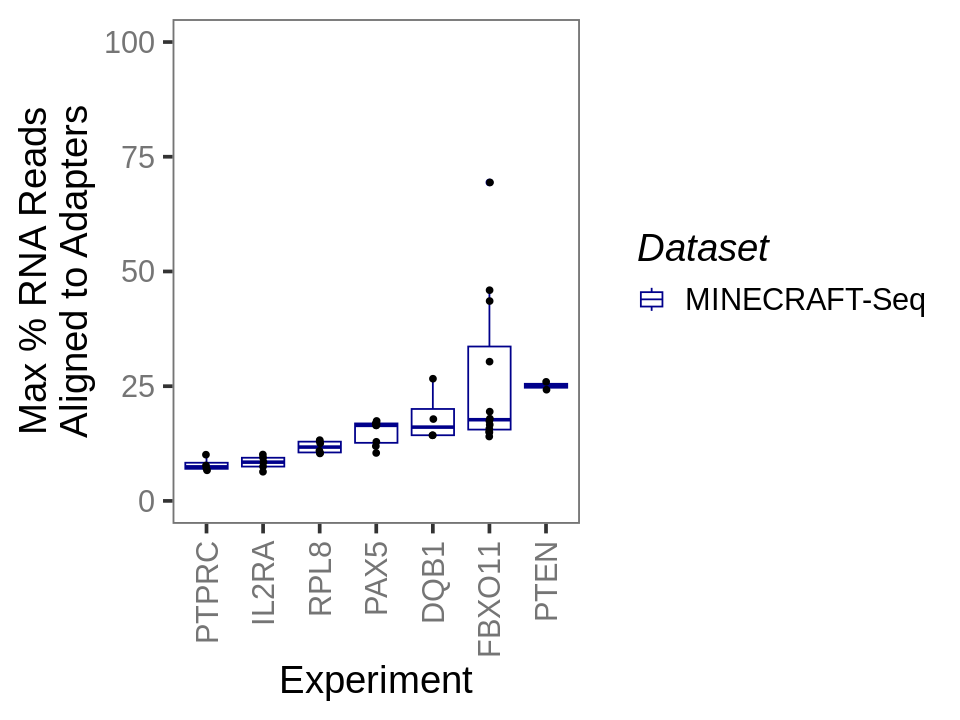

In [1173]:
# pdf(file = '../Figures/Mapping_RNAAdapters.pdf', width = 8, height = 6)
fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq') %>% drop_na(PlateLabel_Rename))+
    geom_boxplot(aes(x = `PlateLabel_Rename`, y = `AdapterMax`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel_Rename`, y = `AdapterMax`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('Max % RNA Reads\nAligned to Adapters')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)
# dev.off()

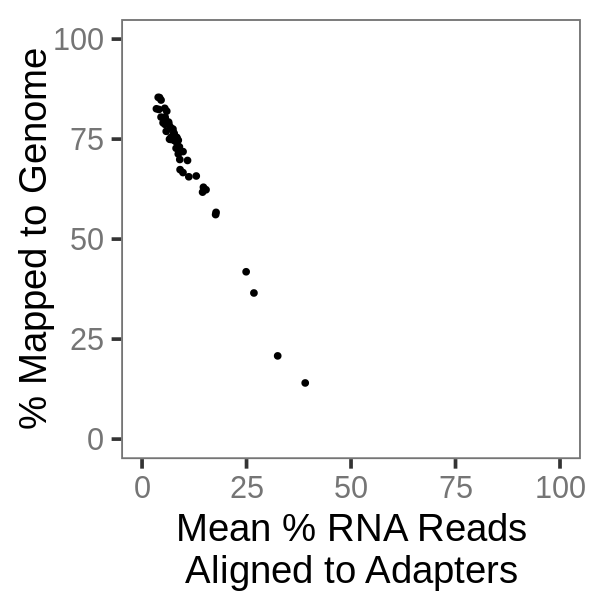

In [1174]:
fig.size(5, 5)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))+
    geom_point(aes(y = `Reads Mapped to Genome`, x = `AdapterMean`))+
    xlab('Mean % RNA Reads\nAligned to Adapters')+
    ylab('% Mapped to Genome')+
    xlim(0, 100)+
    ylim(0, 100)+
    theme_clean()

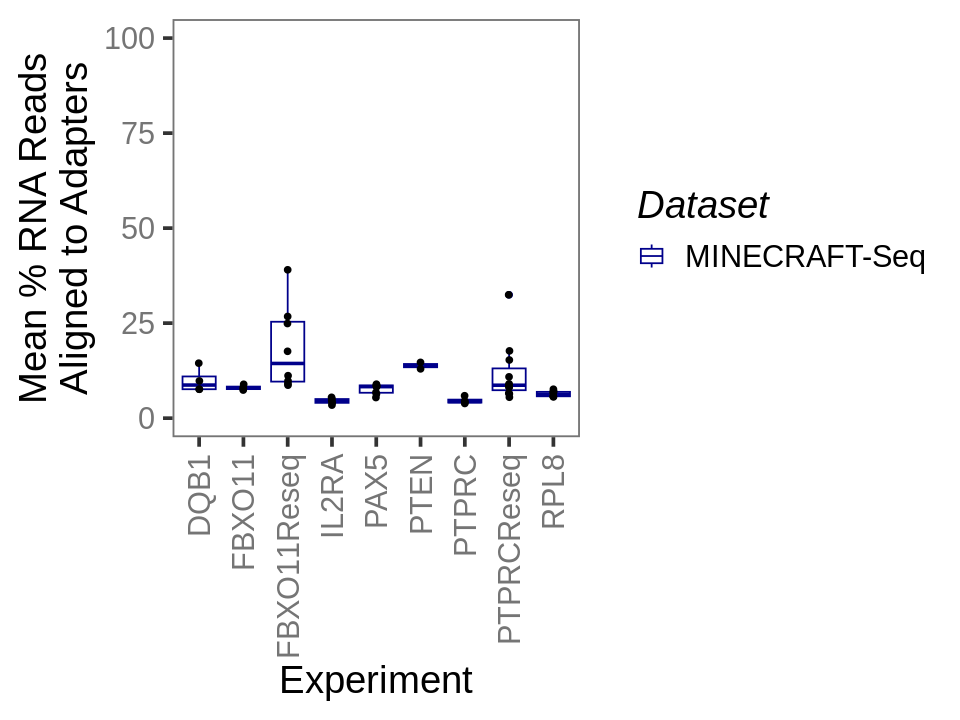

In [1175]:
fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))+
    geom_boxplot(aes(x = `Experiment`, y = `AdapterMean`, col = DatasetType))+
    geom_jitter(aes(x = `Experiment`, y = `AdapterMean`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('Mean % RNA Reads\nAligned to Adapters')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

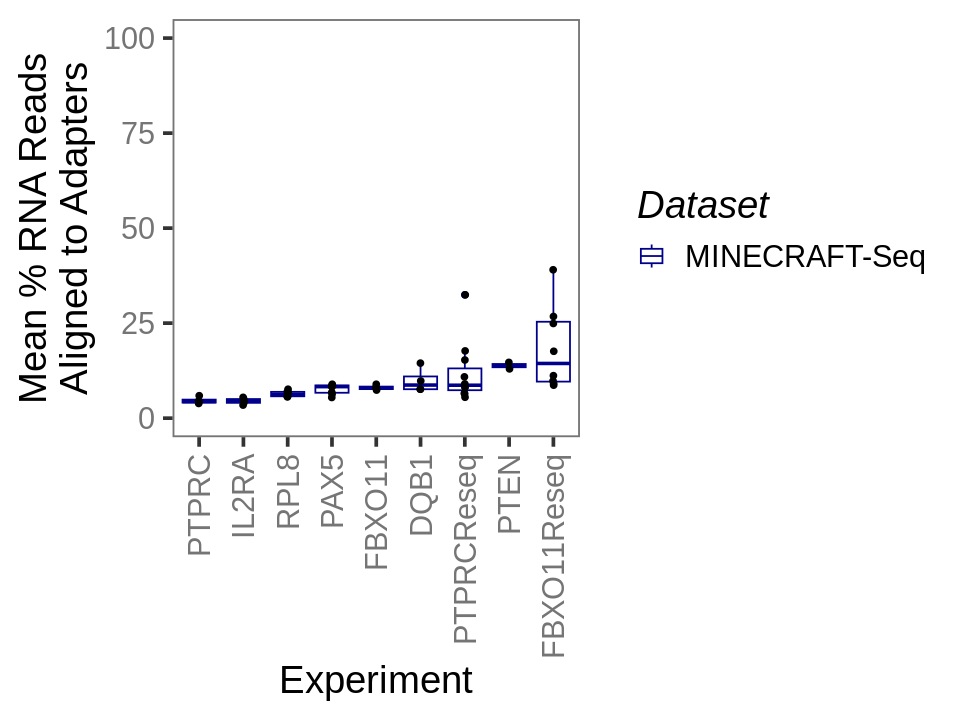

In [1176]:
fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq') %>% drop_na(PlateLabel))+
    geom_boxplot(aes(x = `PlateLabel`, y = `AdapterMean`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel`, y = `AdapterMean`), 
                width = 0.01, height = 0.01)+
    ylim(0, 100)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('Mean % RNA Reads\nAligned to Adapters')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

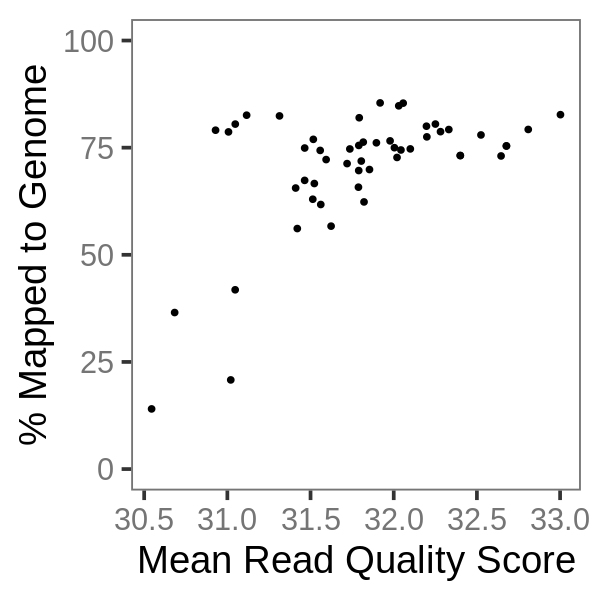

In [1177]:
fig.size(5, 5)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))+
    geom_point(aes(y = `Reads Mapped to Genome`, x = `QualityMean`))+
    xlab('Mean Read Quality Score')+
    ylab('% Mapped to Genome')+
    # xlim(0, 100)+
    ylim(0, 100)+
    theme_clean()

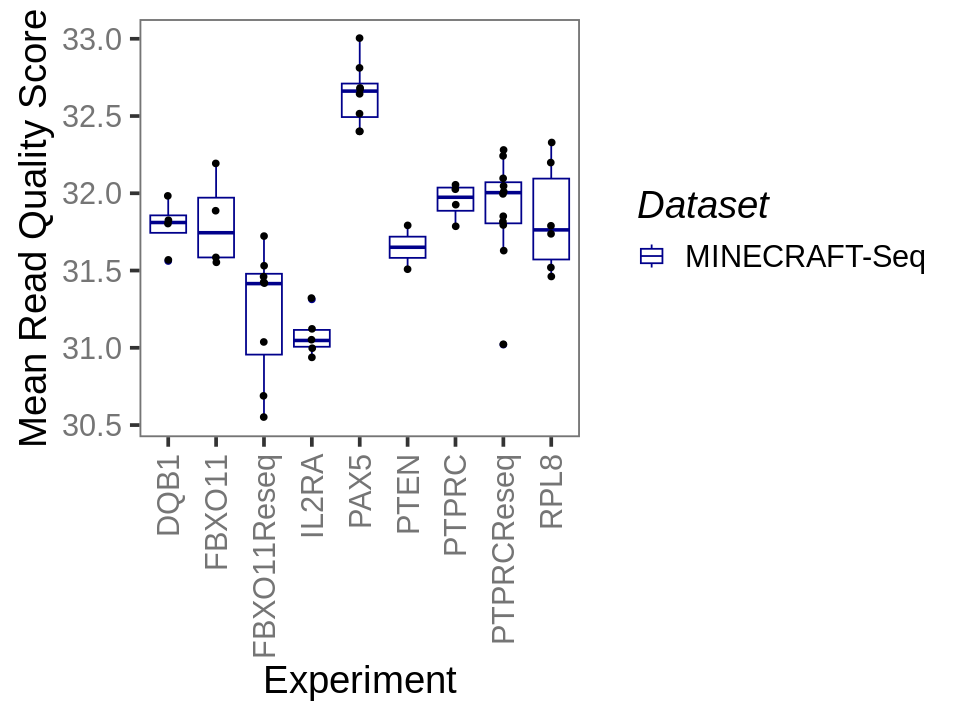

In [1178]:
fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq'))+
    geom_boxplot(aes(x = `Experiment`, y = `QualityMean`, col = DatasetType))+
    geom_jitter(aes(x = `Experiment`, y = `QualityMean`), 
                width = 0.01, height = 0.01)+
    # ylim(0, 1)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('Mean Read Quality Score')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

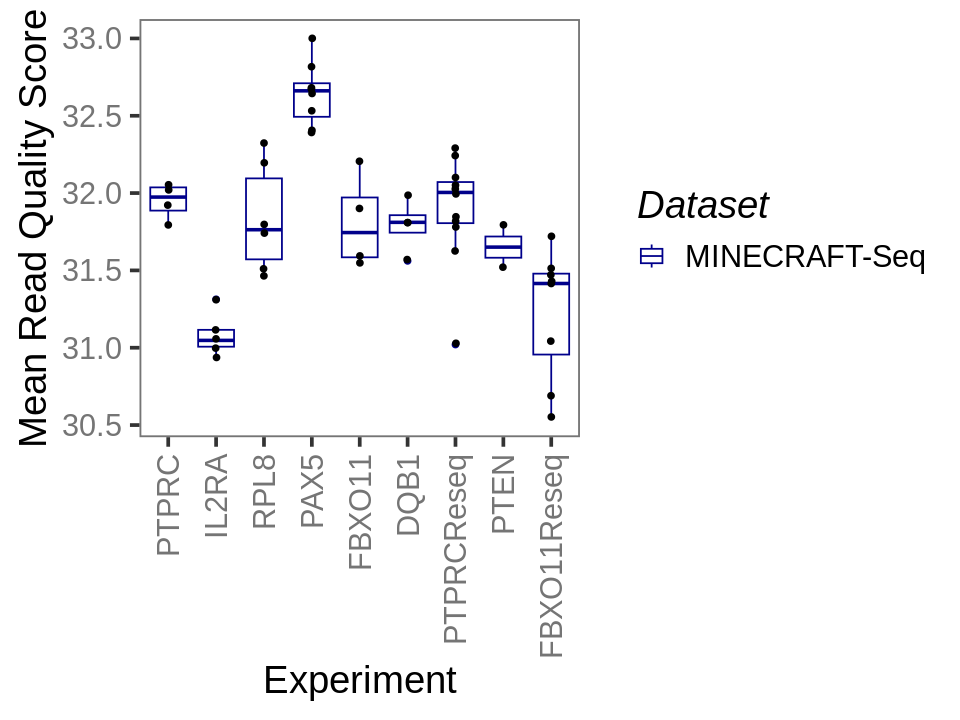

In [1179]:

fig.size(6, 8)
ggplot(stats_all_df %>% filter(dataset == 'MINECRAFT-Seq') %>% drop_na(PlateLabel))+
    geom_boxplot(aes(x = `PlateLabel`, y = `QualityMean`, col = DatasetType))+
    geom_jitter(aes(x = `PlateLabel`, y = `QualityMean`), 
                width = 0.01, height = 0.01)+
    # ylim(0, 1)+
    theme_clean()+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    xlab('Experiment')+
    ylab('Mean Read Quality Score')+
    labs(col = 'Dataset')+
    scale_color_manual(values=cmap)

In [1180]:
out_var_map = c('Reads Mapped to Genome', 'Reads Mapped Confidently to Genome', 
        'Reads Mapped Confidently to Transcriptome',
        'Antibody: Fraction Antibody Reads', 'ADT Reads Mapped to RNA Genome', 
               'ADT Reads Mapped to RNA Transcriptome', 'pct_aligned',
               'AdapterMax', 'AdapterMean')

In [1181]:
names(out_var_map) = c('RNA Reads Mapped to Genome', 'RNA Reads Mapped Confidently to Genome',
         'RNA Reads Mapped Confidently to Transcriptome', 
         'ADT Reads Mapped to ADT Reference', 'ADT Reads Mapped to RNA Genome',
                      'ADT Reads Mapped to RNA Transcriptome', 'DNA Reads Aligned to Amplicon',
                      'Max RNA Reads Aligned to Adapters', 'Mean RNA Reads Aligned to Adapters')

In [1183]:
stats_out = stats_all_df
stats_out = stats_out %>% select(-c(DatasetType, Experiment, QualityMean))
stats_out = stats_out %>% rename(out_var_map) %>% select(c(dataset, PlateLabel, PlateLabel_Rename,
                                              names(out_var_map)))

In [1184]:
stats_out = stats_out %>% mutate(dataset = as.character(dataset), PlateLabel = as.character(PlateLabel),
                    PlateLabel_Rename = as.character(PlateLabel_Rename))

In [1185]:
stats_out$PlateLabel %>% unique %>% sort

[1] "AMP-RA"      "DQB1"        "FBXO11"      "FBXO11Reseq" "IL2RA"      
 [6] "PAX5"        "PTEN"        "PTPRC"       "PTPRCReseq"  "RPL8"       
[11] "TBRU"

In [1186]:
stats_out = rbind(stats_out %>% filter(dataset =='MINECRAFT-Seq') %>% filter(PlateLabel!='PTPRCReseq'),
      stats_out %>% filter(dataset !='MINECRAFT-Seq'))

In [1187]:
stats_out

,dataset,PlateLabel,PlateLabel_Rename,RNA Reads Mapped to Genome,RNA Reads Mapped Confidently to Genome,RNA Reads Mapped Confidently to Transcriptome,ADT Reads Mapped to ADT Reference,ADT Reads Mapped to RNA Genome,ADT Reads Mapped to RNA Transcriptome,DNA Reads Aligned to Amplicon,Max RNA Reads Aligned to Adapters,Mean RNA Reads Aligned to Adapters
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD45_P1,MINECRAFT-Seq,PTPRC,PTPRC,81.9799,62.0248,66.5384,57.8,38.09920,10.56040,99.061003,10.073794,5.907397
CD45_P2,MINECRAFT-Seq,PTPRC,PTPRC,84.7599,64.0069,67.9392,59.0,42.13770,11.84500,98.997337,7.730365,4.543583
CD45_P3,MINECRAFT-Seq,PTPRC,PTPRC,85.4433,65.5068,69.1673,60.8,39.18830,11.46900,98.734620,6.652382,3.864829
CD45_P4,MINECRAFT-Seq,PTPRC,PTPRC,85.3873,64.7653,68.4960,60.9,41.35290,11.91360,98.948254,7.102489,4.180666
DQB1_P1,MINECRAFT-Seq,DQB1,DQB1,76.2926,54.7583,59.1827,66.4,38.99390,12.07230,97.379424,14.316439,7.616082
DQB1_P2,MINECRAFT-Seq,DQB1,DQB1,76.5852,55.2951,59.3648,71.7,44.03780,13.74640,97.786733,14.290248,7.605853
DQB1_P3,MINECRAFT-Seq,DQB1,DQB1,71.8718,51.0873,55.1608,66.9,29.74170,9.25112,97.475567,17.838636,9.809056
DQB1_P4,MINECRAFT-Seq,DQB1,DQB1,61.7375,43.7088,47.5707,61.6,31.34600,9.71635,98.153714,26.620209,14.480761
FBXO11_1,MINECRAFT-Seq,FBXO11Reseq,FBXO11,66.6309,49.2771,53.2616,65.3,28.58740,8.95311,85.762384,17.930568,9.793291


In [1191]:
write.table(stats_out %>% filter(dataset == 'MINECRAFT-Seq'),
  file = '../Misc/Table_MappingStatistics.txt',
  sep = "\t",             
  row.names = TRUE,       
  col.names = TRUE,      
  quote = FALSE)


In [1189]:
write.table(stats_out,
  file = '../Misc/Table_MappingStatistics_All.txt',
  sep = "\t",             
  row.names = TRUE,       
  col.names = TRUE,      
  quote = FALSE)


# End

In [714]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /PHShome/mc1070/anaconda3/envs/seurat5_env/lib/libopenblasp-r0.3.27.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] stringi_1.8.4                dendsort_0.3.4              
 [3] patchwork_1.2.0              magrittr_2.0.3              
 [5] thp1.eccite.SeuratData_3.1.5 pbmcref.SeuratData_1.0.0    
 [7] SeuratData_0.2.2.9001        lubridate_1.9.3             
 [9] forcats_1.0.0                stringr_